In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tqdm import tqdm


In [30]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [31]:
df=pd.read_csv('intern_task.csv')

In [32]:
df

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,...,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,0.000000,1.0,10.0,0.0,9.0,11.0,30.0,8.198216,22.240604,18.240926,21.439961,8.194138,0.000000,0.0,1.0,5.0,7.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,4.0,0.000000e+00,0.0,0.333333,1.666667,2.333333,0.222222,0.0,0.222222,0.222222,1.555556,0.100000,0.0,0.111111,...,79.371724,0.0,0.0,0.0,1.0,1.0,0,0.0,0.786755,0.971298,0.946833,11.904045,0.0,7.738967,26.350077,22.927740,-19.201910,-20.839029,-17.627562,-7.865720,-9.926361,-22.574108,-24.810069,-21.077948,-20.642055,-19.589214,-21.995388,-23.636237,-20.421283,-6.122882,-8.437561,3.0,76.0,0.0,0.0,153.0,3866.0,17.0,104.0,0.0,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,0.004251,1.0,557.0,0.0,7.0,11.0,575.0,8.198216,22.240604,18.240926,21.439961,8.194138,0.000004,0.0,4.0,0.0,48.0,6.0,0.0,1.0,0.0,7.0,31.0,0.0,2.0,0.0,33.0,8.501341e+00,0.0,1.333333,0.000000,16.000000,133.555556,0.0,0.222222,0.000000,144.666667,0.078995,0.0,0.571429,...,860.715989,1.0,0.0,1.0,0.0,1.0,0,0.0,0.948870,0.000000,0.792060,23.900332,0.0,21.651734,0.000000,24.339780,-12.018080,-20.839029,-7.961910,-24.026420,-11.733085,-16.087395,-24.810069,-20.081042,-27.079631,-15.792263,-12.102374,-23.636237,-5.459244,-26.827529,-11.848628,3.0,73.0,0.0,9.0,266.0,56137.0,5.0,2.0,0.0,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,0.008501,1.0,522.0,0.0,6.0,8.0,536.0,8.198216,22.240604,18.240926,21.439961,8.194138,0.000009,0.0,2.0,0.0,24.0,1.0,0.0,0.0,0.0,1.0,14.0,0.0,1.0,0.0,15.0,1.700268e+01,0.0,0.666667,0.000000,8.000000,28.222222,0.0,0.222222,0.000000,32.666667,0.042146,0.0,0.333333,...,1212.898917,1.0,0.0,0.0,0.0,1.0,0,0.0,0.895471,0.000000,0.918119,21.009703,0.0,15.027157,0.000000,21.160657,-15.320776,-20.839029,-13.173918,-24.026420,-15.174661,-18.149604,-24.810069,-20.741199,-27.079631,-17.982153,-14.476324,-23.636237,-12.939705,-26.827529,-14.353039,4.0,54.0,8.0,0.0,541.0,12621.0,11.0,11.0,0.0,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,0.012752,1.0,59.0,0.0,5.0,5.0,69.0,8.198216,22.240604,18.240926,21.439961,8.194138,0.000013,0.0,3.0,0.0,11.0,2.0,0.0,1.0,0.0,3.0,4.0,0.0,1.0,0.0,5.0,2.550402e+01,0.0,1.000000,0.000000,3.666667,0.888889,0.0,0.000000,0.000000,0.888889,0.135593,0.0,0.600000,...,105.747626,1.0,0.0,1.0,0.0,1.0,0,0.0,1.000000,0.000000,0.984724,23.622797,0.0,22.468922,0.000000,24.653968,-10.483058,-20.839029,-8.412880,-24.026420,-9.558375,-19.179620,-24.810069,-20.355124,-27.079631,-18.418511,-9.772067,-23.636237,-5.143084,-26.827529,-9.208571,2.0,36.0,6.0,0.0,14687.0,40205.0,5.0,3.0,0.0,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,

In [33]:
scaler = MinMaxScaler()
df_scaled = df.copy()

df_scaled[df.columns[2:]] = scaler.fit_transform(df[df.columns[2:]])

In [34]:
df_scaled.isna().sum().sum()

0

In [35]:
list(set(df_scaled.dtypes))

[dtype('int64'), dtype('float64')]

In [36]:
df_scaled

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,...,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,0.032258,0.0,0.037037,0.333333,0.096774,0.333333,0.0,0.333333,0.000000,1.0,0.000739,0.000000,0.001554,0.049180,0.002066,0.054778,0.046859,0.043315,0.035604,0.054893,0.000000,0.0,0.003876,0.119048,0.000461,0.000000,0.0,0.000000,0.02381,0.000633,0.000644,0.0,0.004975,0.047619,0.002533,0.000000,0.0,0.003205,0.039683,0.001478,6.617290e-07,0.0,0.000025,0.013889,4.584519e-06,0.050000,0.0,0.023392,...,0.000010,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.786755,0.971298,0.946833,0.038905,0.0,0.027194,0.539698,0.054738,0.900468,0.938430,0.948923,0.928777,0.948367,0.878416,0.931056,0.940368,0.810631,0.894598,0.874486,0.935964,0.944320,0.952260,0.951930,0.066667,0.067290,0.000000e+00,0.000000,0.000810,0.058977,0.063241,0.409449,0.000000,0.000000,0.000000e+00,0.555555,0.890238,0.003453,1.000000,0.109352,0.008888,0.000066,0.000215
1,1,10,0.096774,0.0,0.111111,0.000000,0.096774,1.000000,0.0,1.000000,0.000004,1.0,0.041137,0.000000,0.001209,0.049180,0.042282,0.054778,0.046859,0.043315,0.035604,0.054893,0.000004,0.0,0.015504,0.000000,0.003162,0.003866,0.0,0.009615,0.00000,0.004433,0.019974,0.0,0.009950,0.000000,0.020899,0.000004,0.0,0.012821,0.000000,0.010133,3.976995e-04,0.0,0.000025,0.000000,4.263602e-04,0.039497,0.0,0.120301,...,0.000106,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.948870,0.000000,0.792060,0.056061,0.0,0.076083,0.000000,0.056755,0.937705,0.938430,0.976930,0.782446,0.938970,0.913354,0.931056,0.943189,0.751573,0.915028,0.930939,0.935964,0.983752,0.790828,0.932497,0.066667,0.064486,0.000000e+00,0.064748,0.002537,0.856594,0.015810,0.007874,0.000000,0.000000,0.000000e+00,0.000000,0.773976,0.009227,0.000000,0.039122,0.001720,0.002919,0.009450
2,0,10,0.096774,0.0,0.074074,0.000000,0.096774,1.000000,0.0,0.666667,0.000009,1.0,0.038552,0.000000,0.001036,0.032787,0.039404,0.054778,0.046859,0.043315,0.035604,0.054893,0.000009,0.0,0.007752,0.000000,0.001581,0.000644,0.0,0.000000,0.00000,0.000633,0.009021,0.0,0.004975,0.000000,0.009500,0.000009,0.0,0.006410,0.000000,0.005066,8.403967e-05,0.0,0.000025,0.000000,9.627488e-05,0.021073,0.0,0.070175,...,0.000149,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.895471,0.000000,0.918119,0.051927,0.0,0.052805,0.000000,0.052213,0.920586,0.938430,0.961827,0.782446,0.921068,0.902247,0.931056,0.941321,0.751573,0.903245,0.917393,0.935964,0.964038,0.790828,0.918229,0.100000,0.046729,2.546704e-08,0.000000,0.006740,0.192572,0.039526,0.043307,0.000000,0.000000,0.000000e+00,0.000000,0.918308,0.005326,0.000000,0.020984,0.000416,0.001459,0.004725
3,1,10,0.096774,0.0,0.111111,0.000000,0.096774,1.000000,0.0,1.000000,0.000013,1.0,0.004357,0.000000,0.000864,0.016393,0.004944,0.054778,0.046859,0.043315,0.035604,0.054893,0.000013,0.0,0.011628,0.000000,0.000725,0.001289,0.0,0.009615,0.00000,0.001900,0.002577,0.0,0.004975,0.000000,0.003167,0.000013,0.0,0.009615,0.000000,0.002322,2.646919e-06,0.0,0.000000,0.000000,2.619725e-06,0.067796,0.0,0.126316

In [37]:
df.describe()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,...,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.0,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,2.352580e+05,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,500.000000,0.834909,663.542035,1.526142,8.411803,7.921308,681.401287,10.283856,20.688222,18.649408,19.994009,10.269423,0.500000,0.318977,1.503966,0.591023,24.871877,5.392675,0.092498,0.445154,0.193511,6.194387,14.647153,0.220447,0.938761,0.433307,16.131383,1.000000e+06,0.152373,0.680874,0.301734,10.695360,101.591318,0.093769,0.372950,0.062773,108.727028,0.050600,0.068453,0.229321,...,1.957617e+03,0.699912,0.061779,0.383192,0.184946,0.733046,0.0,0.111128,0.586153,0.321876,0.771466,18.021375,1.785574,10.146377,4.817034,19.156780,-12.285722,-14.173841,-12.084364,-15.635307,-11.826087,-14.725488,-17.963052,-17.556142,-19.481692,-14.390662,-12.156931,-15.049929,-12.070350,-16.529616,-11.748578,2.797461,43.119320,1.102403e+05,4.251175,19304.236953,35757.254593,17.532632,24.302889,2.994573e+02,4.763432e+02,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379
std,0.830033,8193.945170,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,288.676975,0.310762,781.406049,15.416424,58.948846,3.449127,788.301848,6.101613,9.661968,8.932978,9.876109,6.096088,0.288677,1.424956,2.135136,0.890511,64.572165,11.342425,0.503017,0.749515,0.426648,11.943833,23.643525,0.846562,1.389356,0.575326,24.191045,5.773540e+05,0.611187,0.852170,0.445837,14.837634,1560.291932,2.903695,26.527795,0.159651,1585.343630,0.070013,0.204225,

In [38]:
df_scaled['rank'].value_counts()

rank
0    121521
1     75815
2     31910
3      4209
4      1803
Name: count, dtype: int64

Посмотрим как у нас распределены значния. На самом деле тут нет чего-то необычного типо выбросов, которые отличаются например на порядок, значит с даными все хорошо

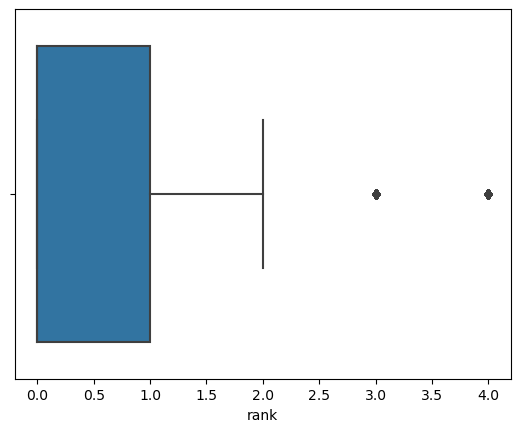

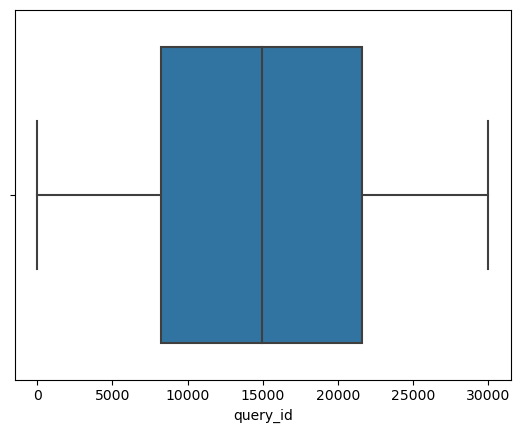

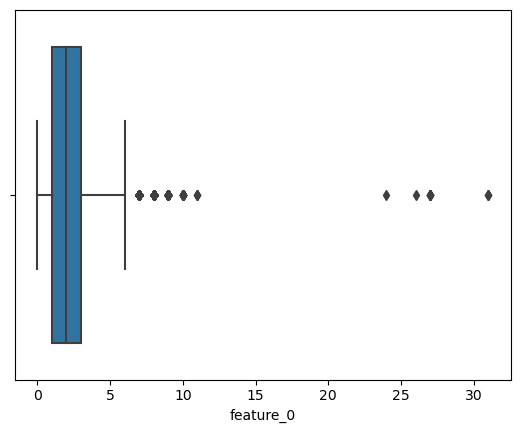

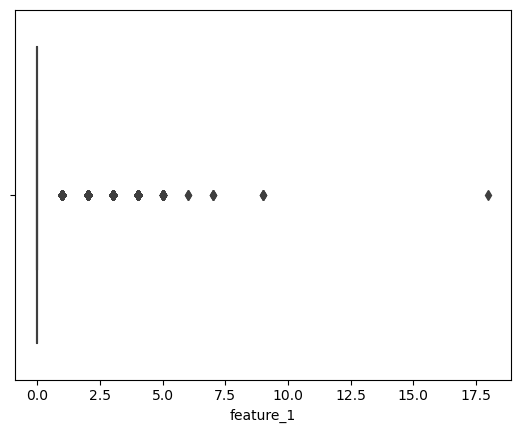

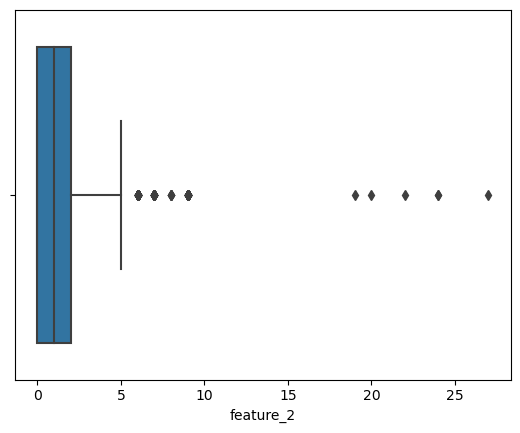

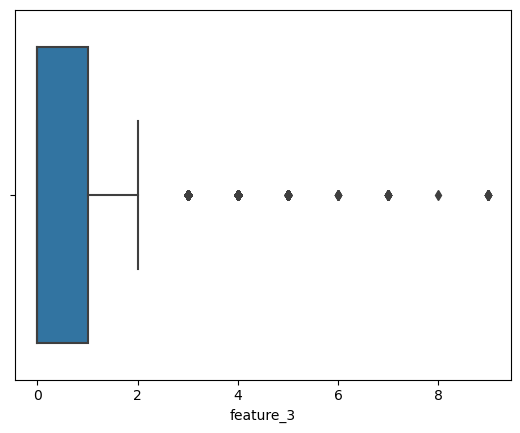

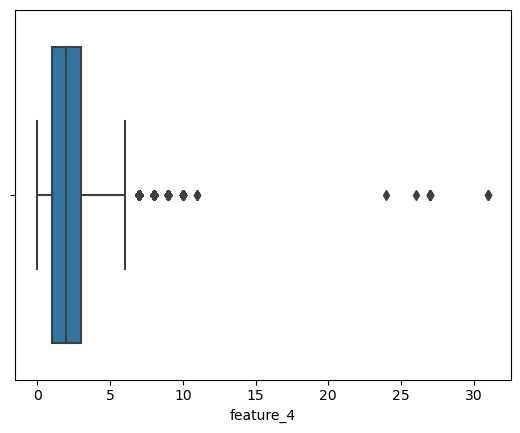

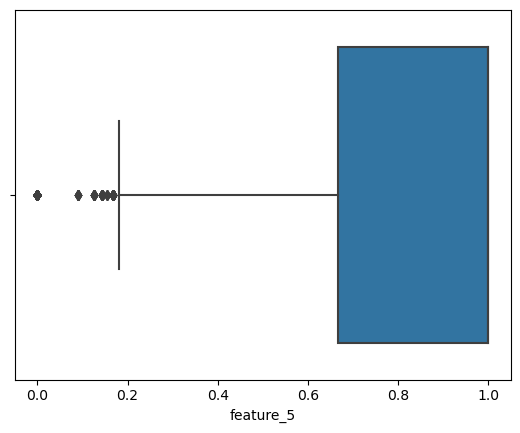

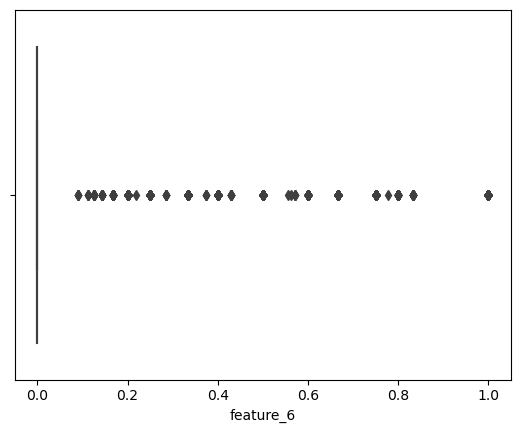

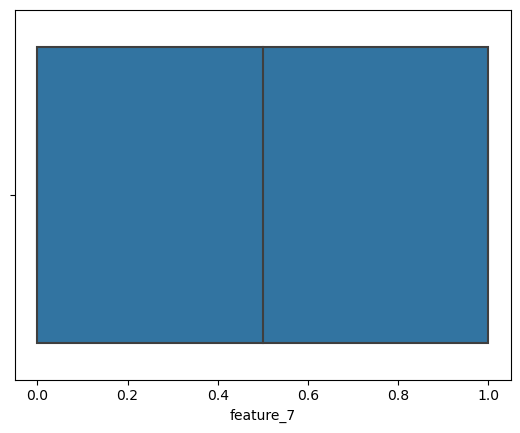

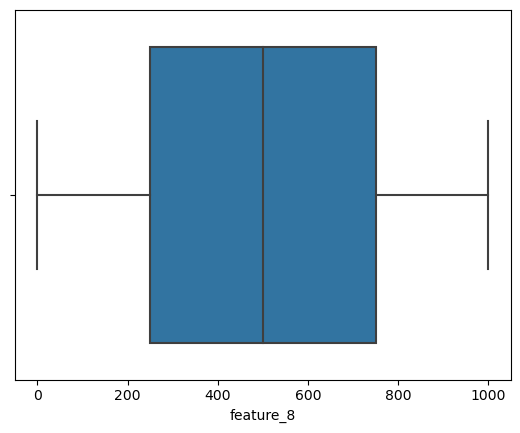

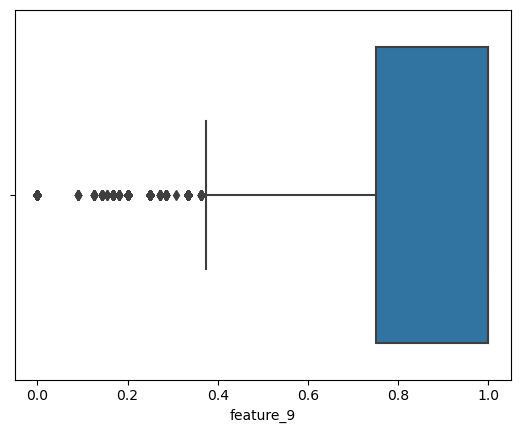

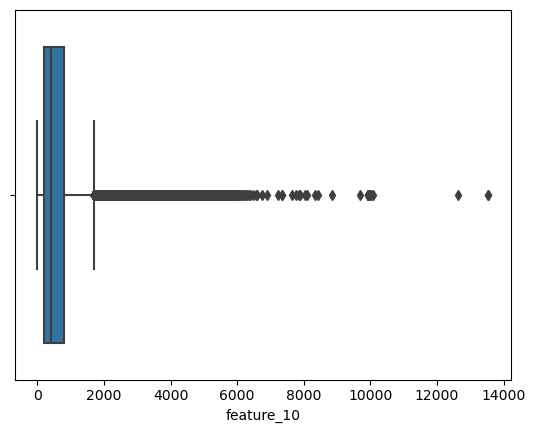

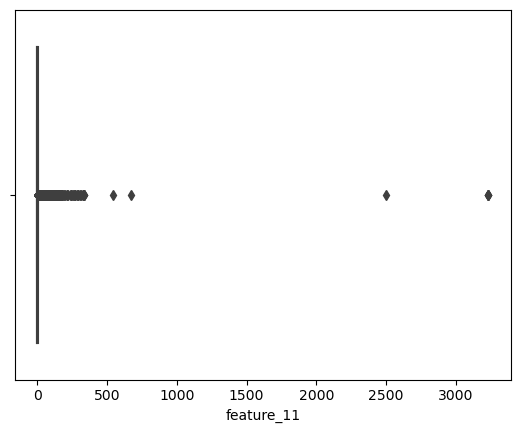

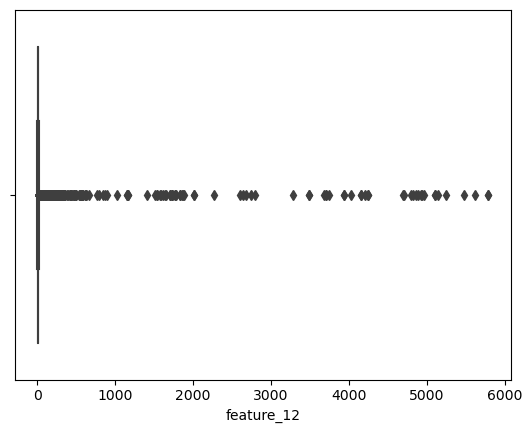

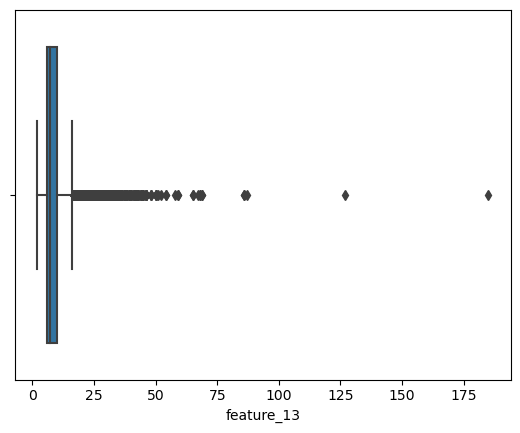

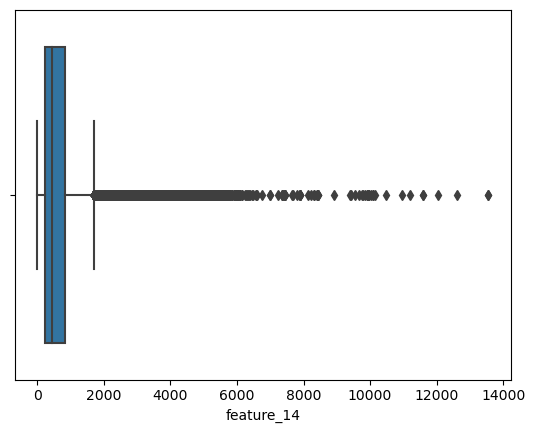

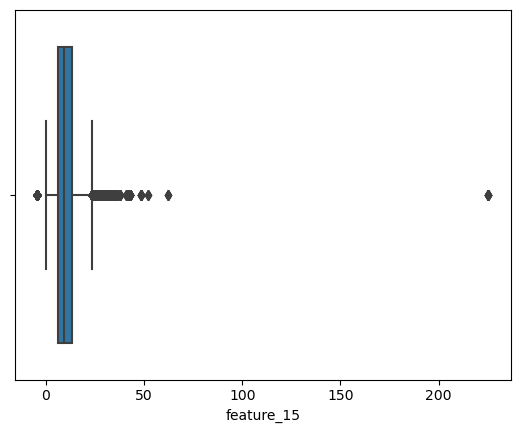

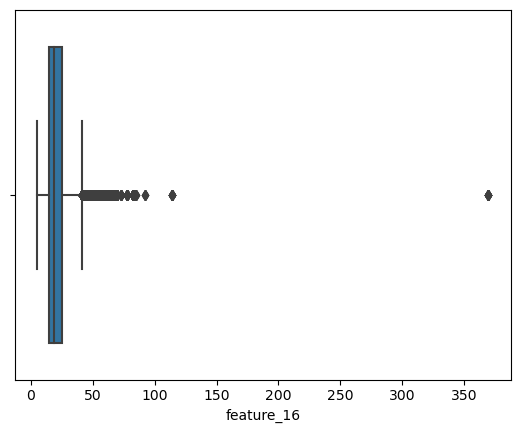

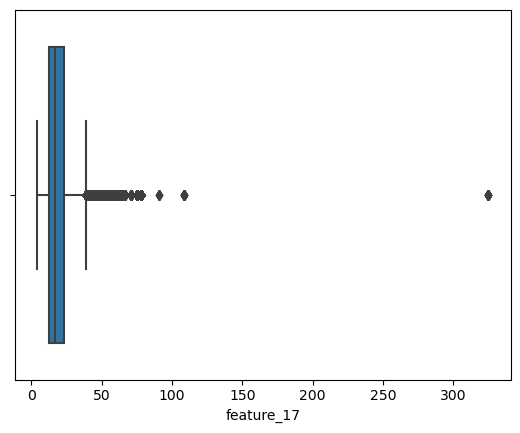

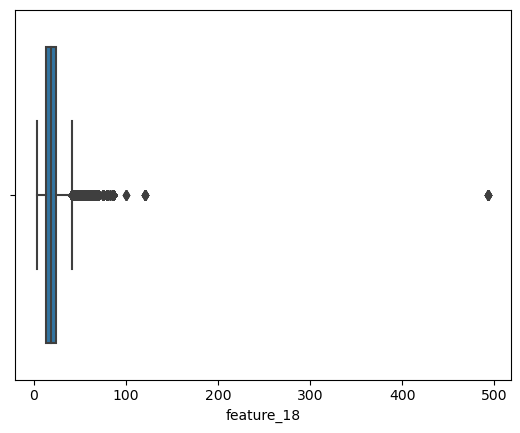

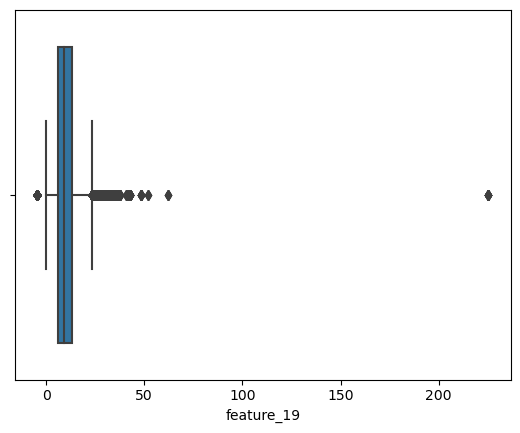

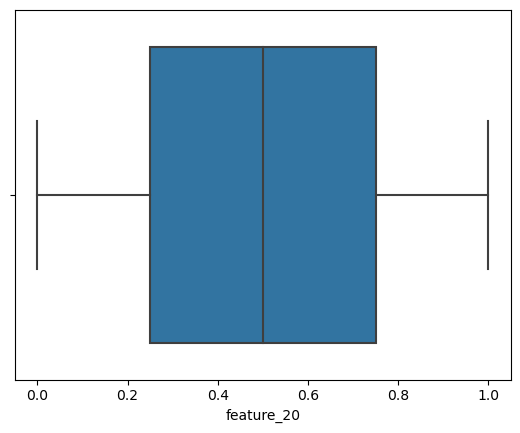

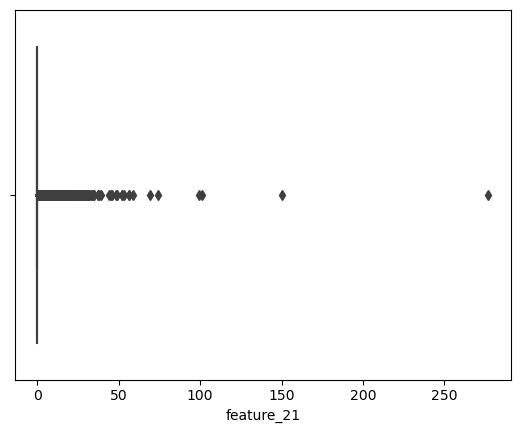

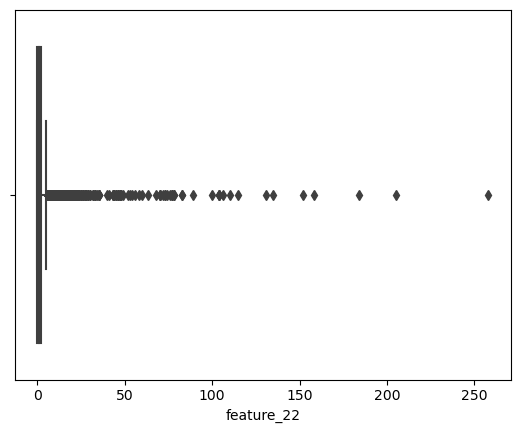

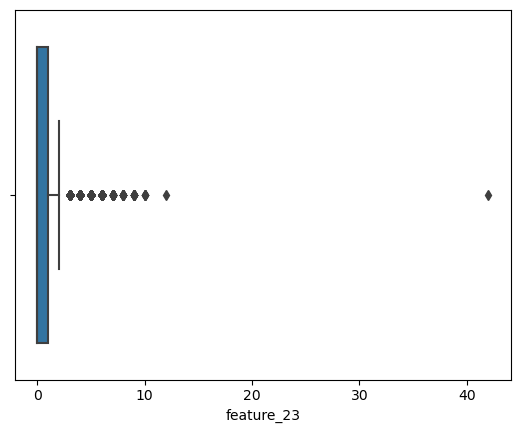

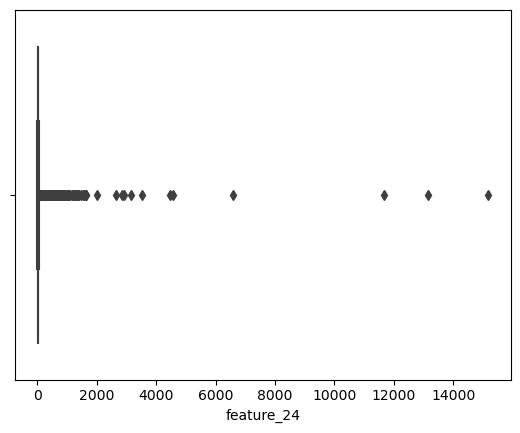

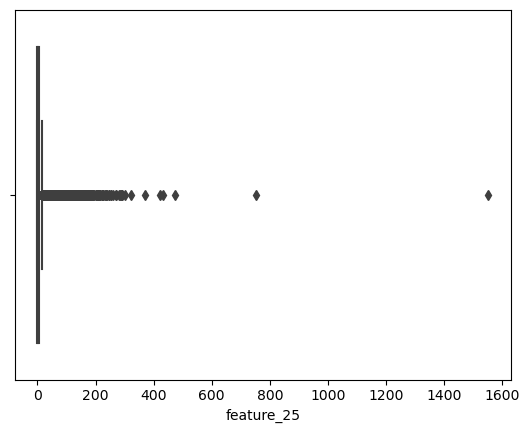

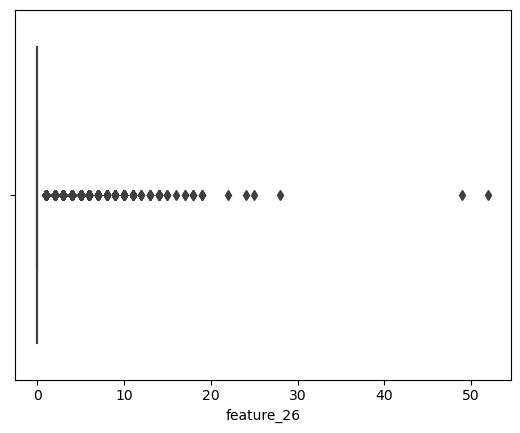

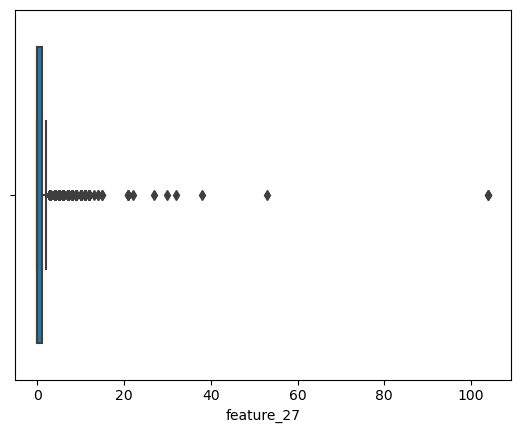

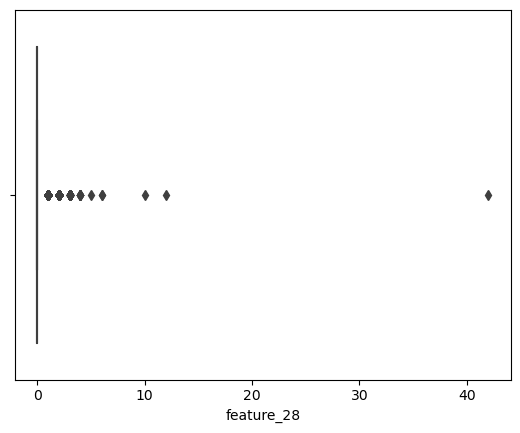

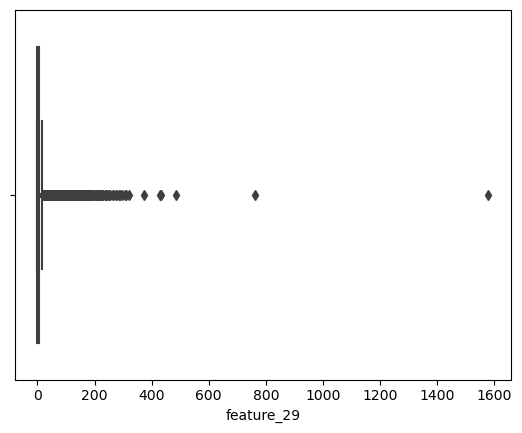

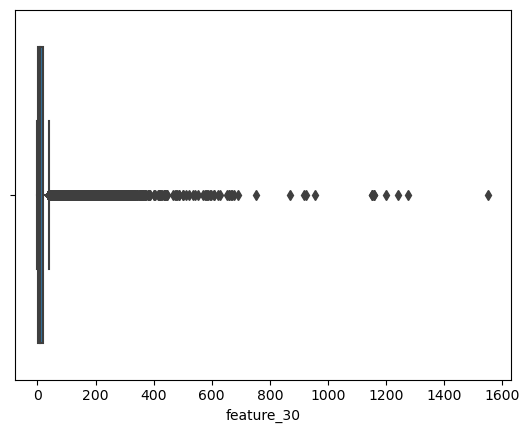

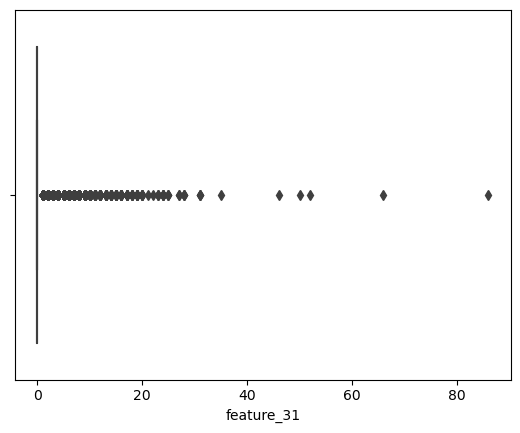

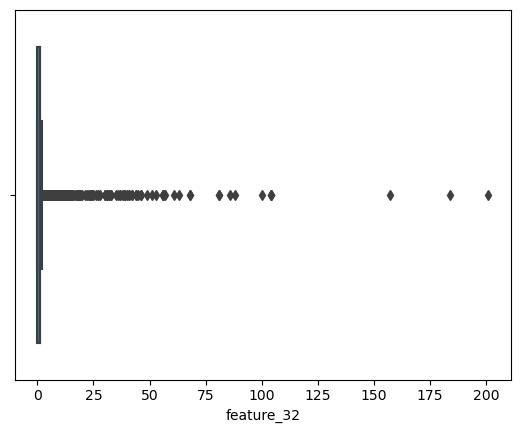

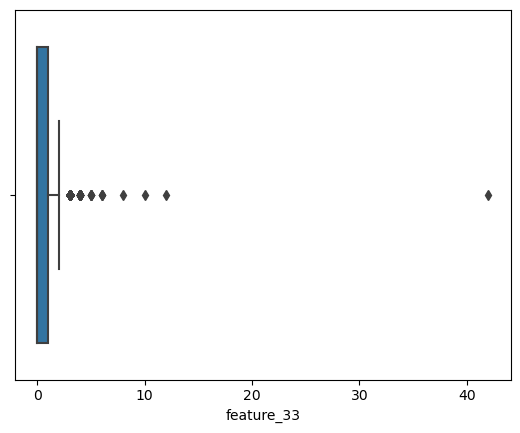

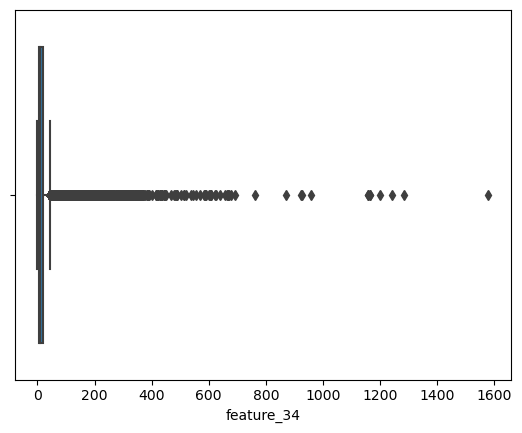

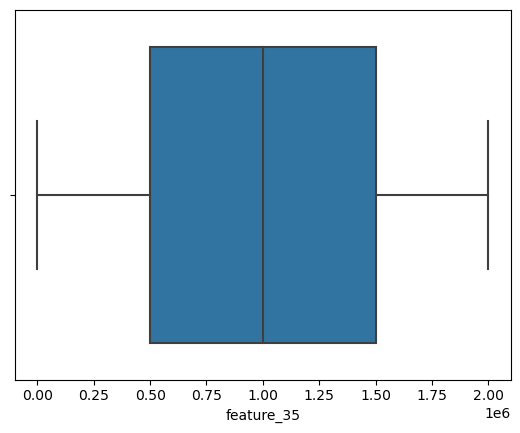

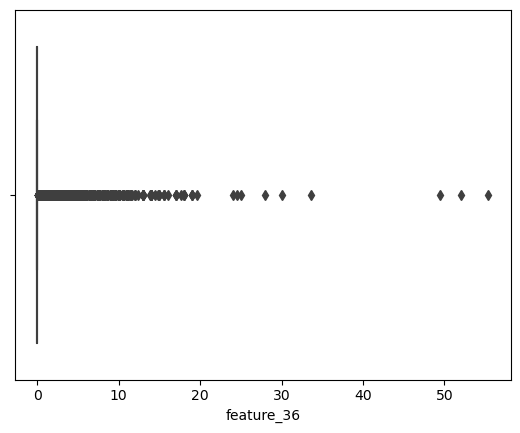

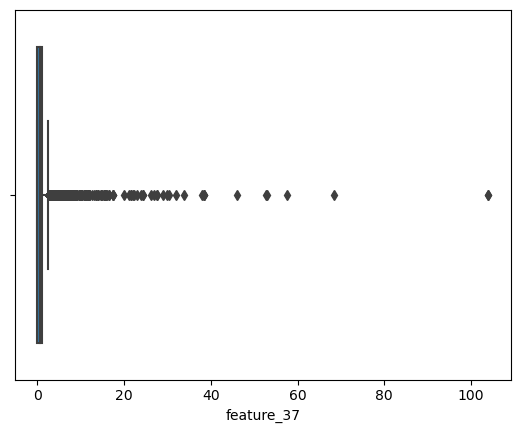

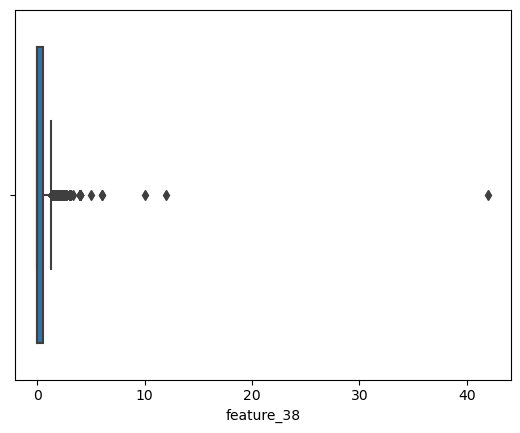

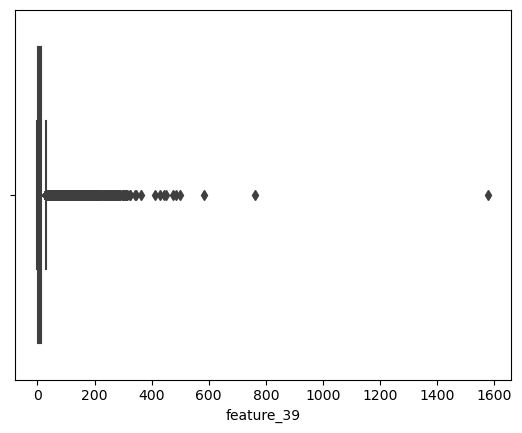

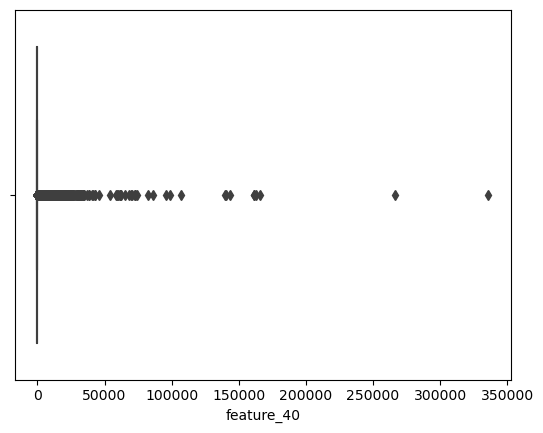

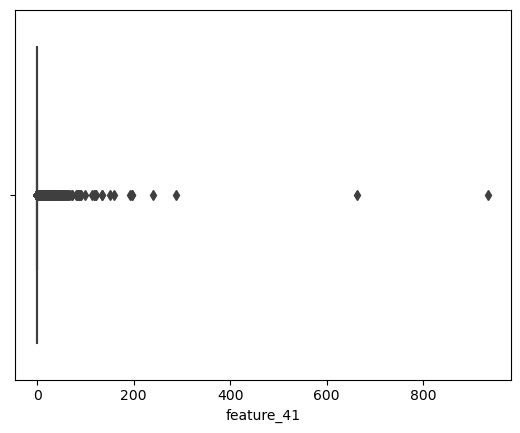

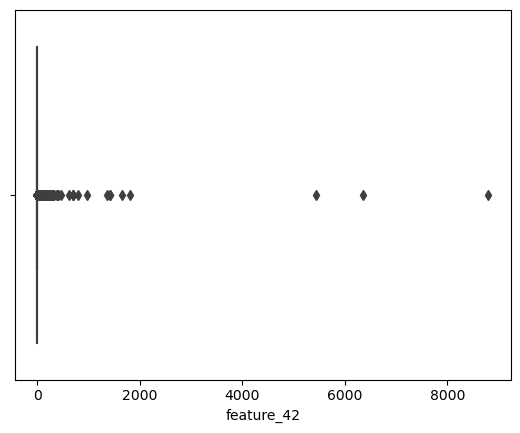

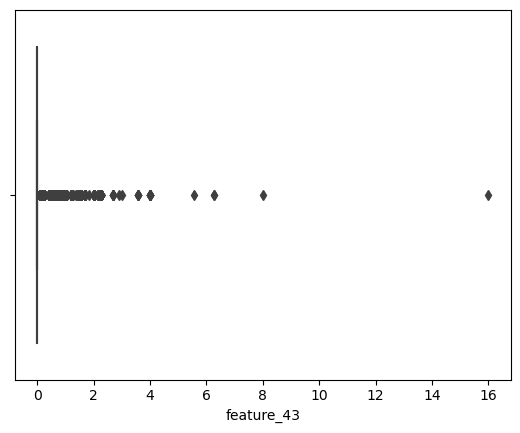

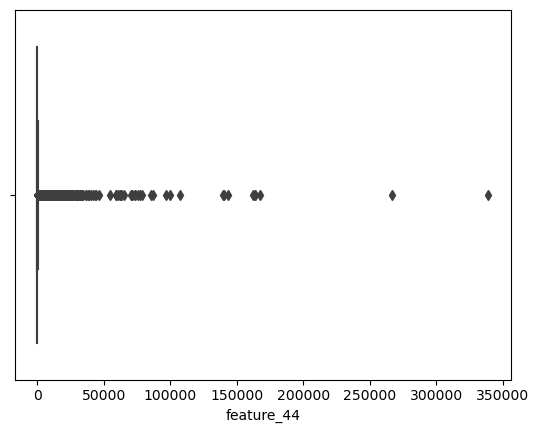

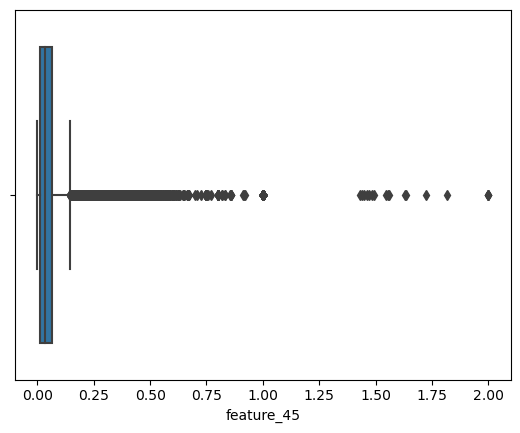

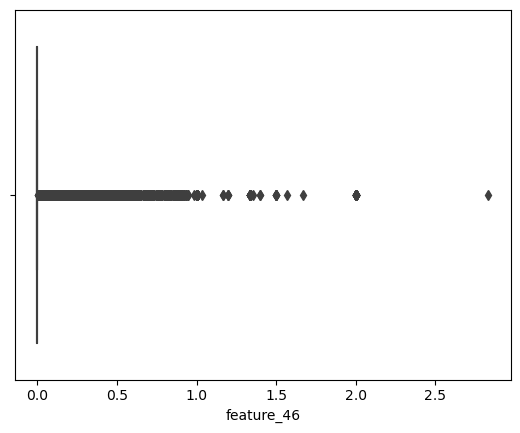

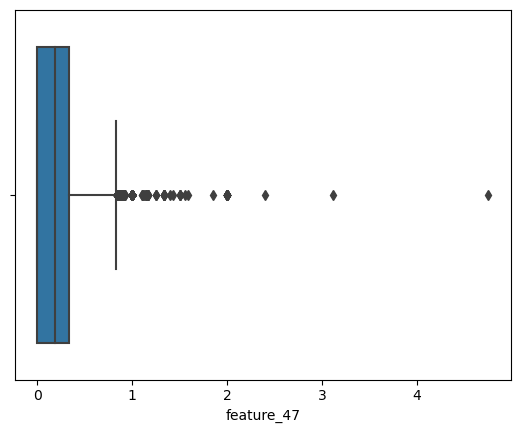

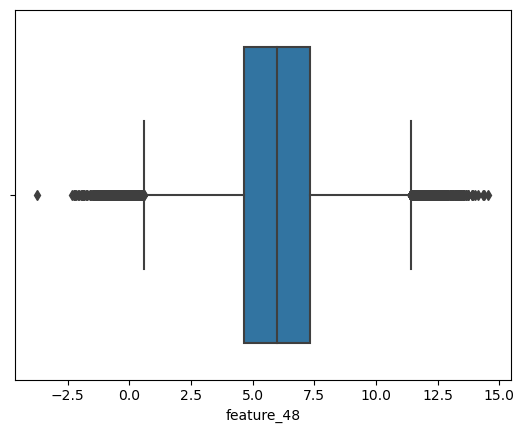

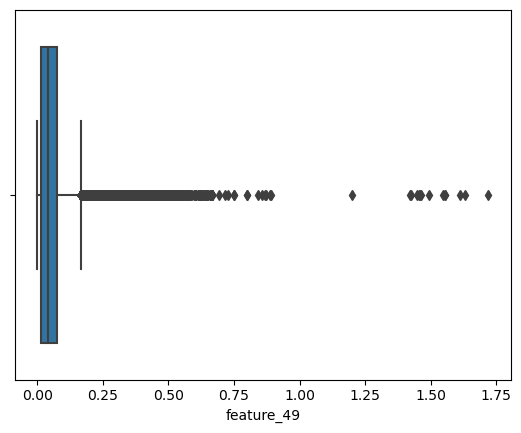

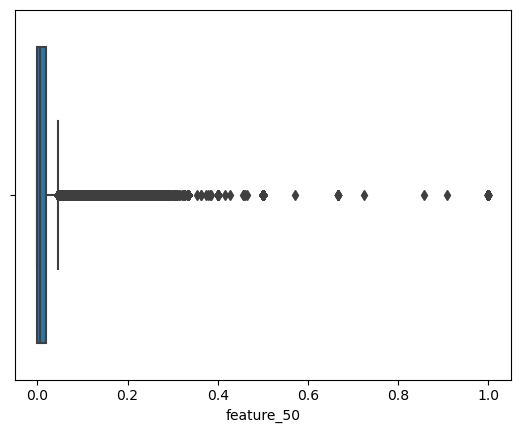

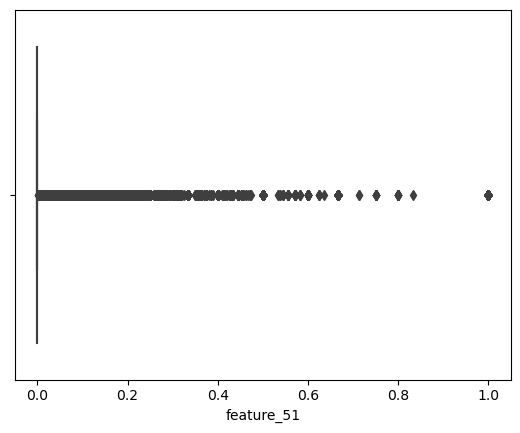

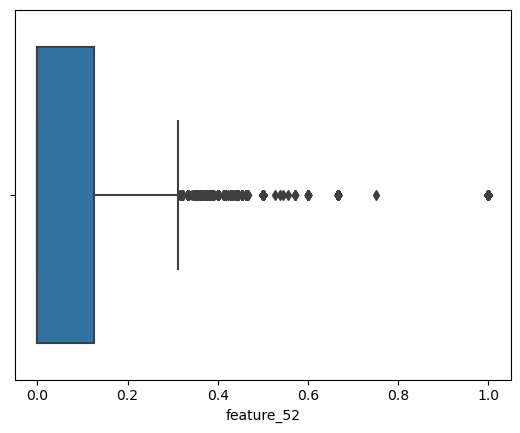

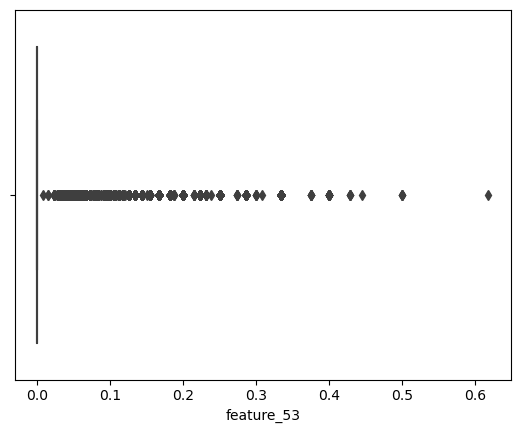

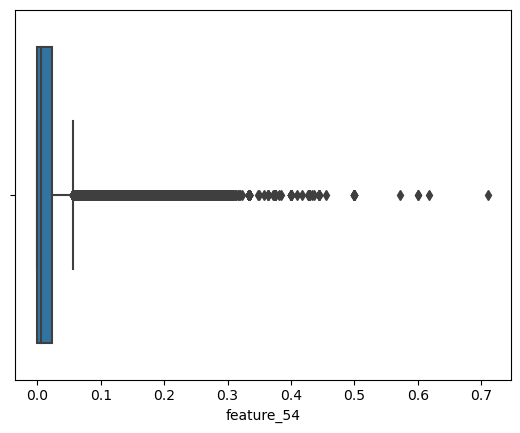

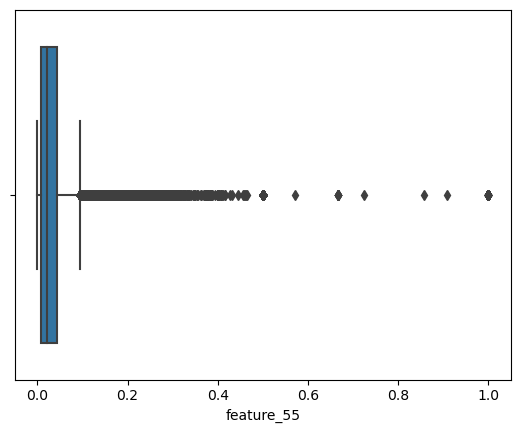

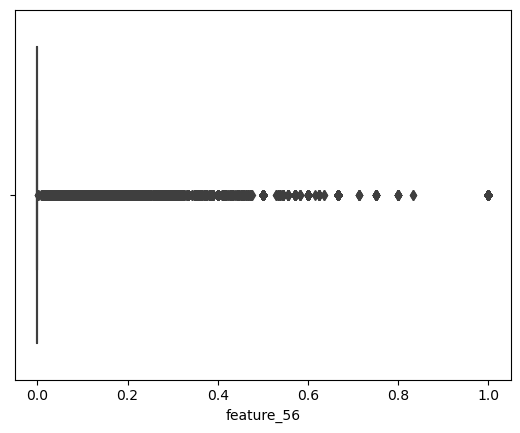

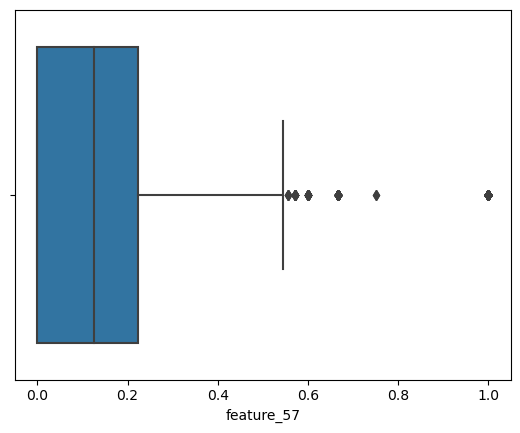

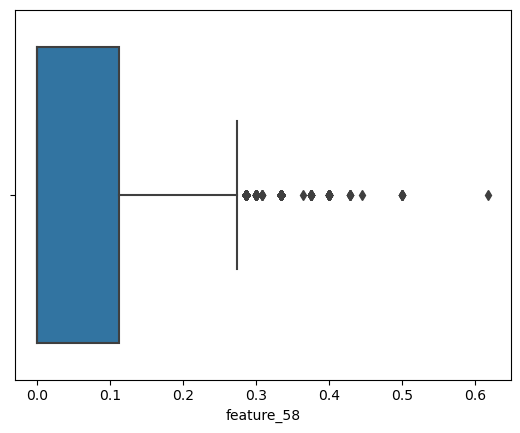

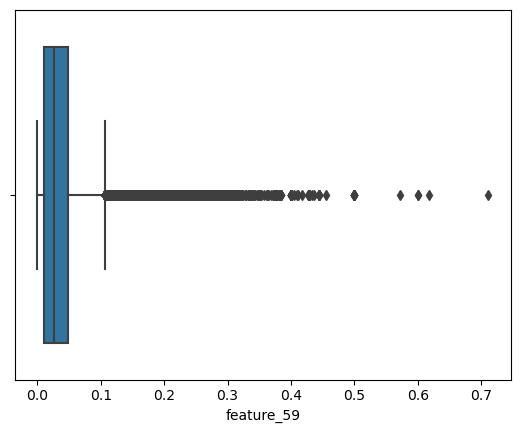

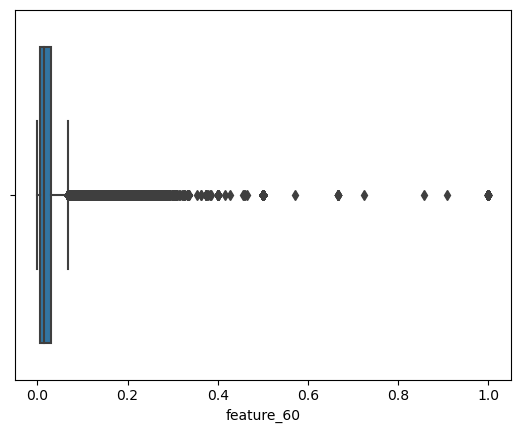

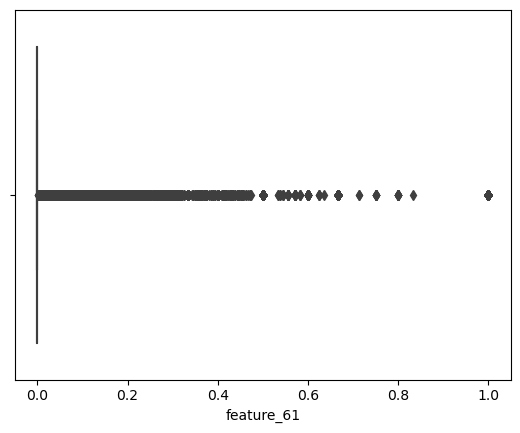

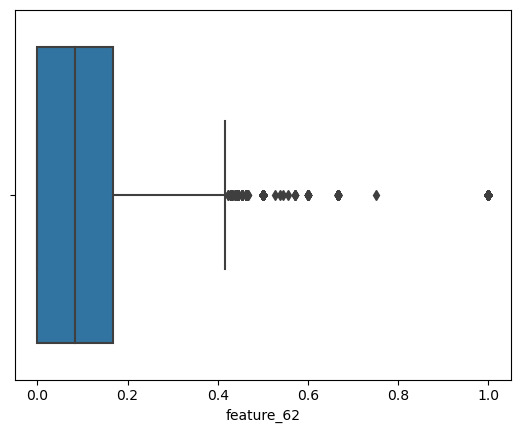

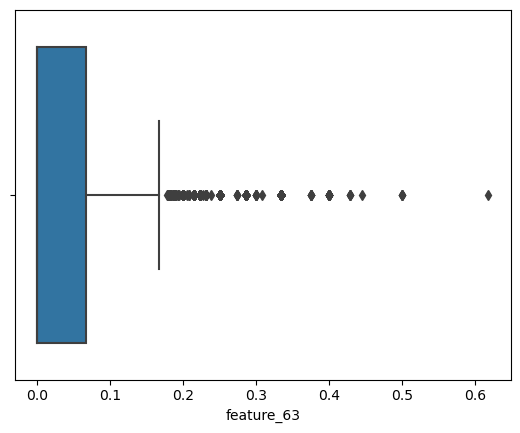

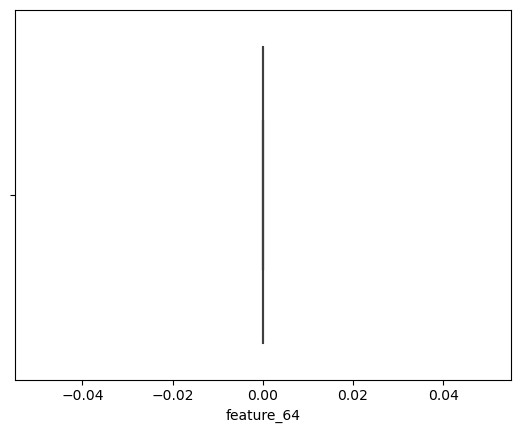

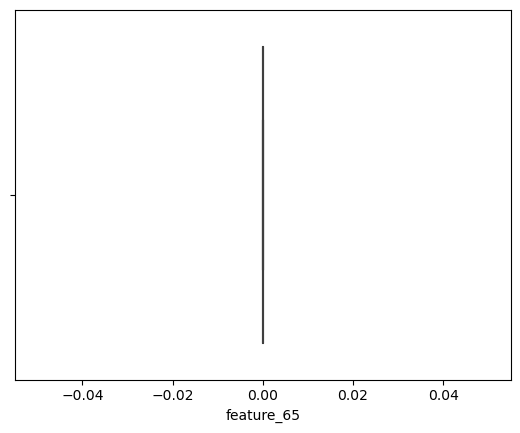

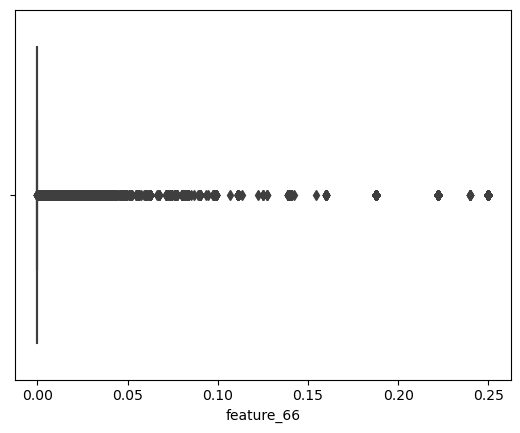

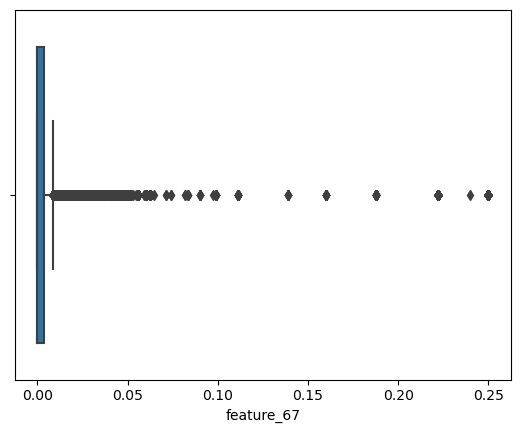

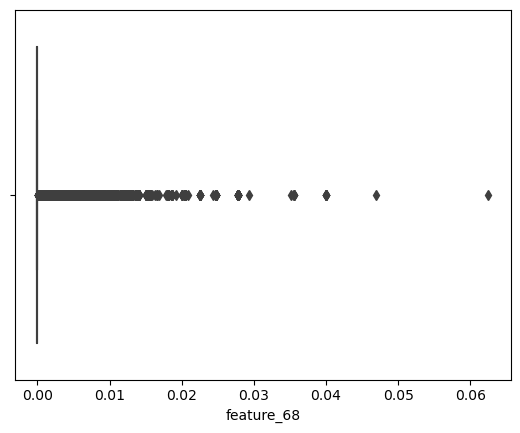

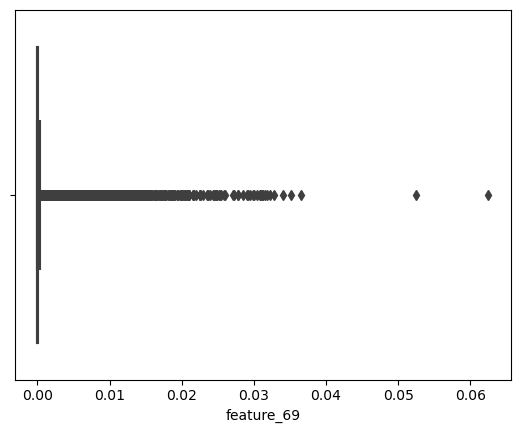

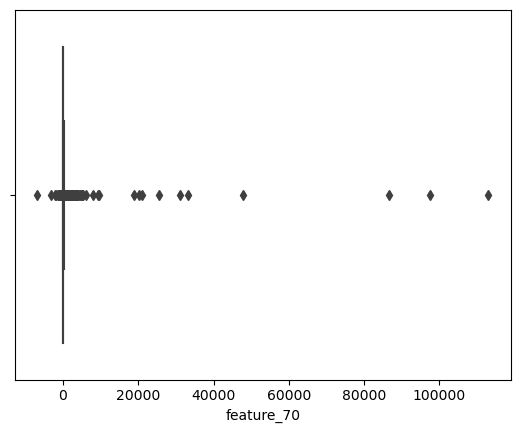

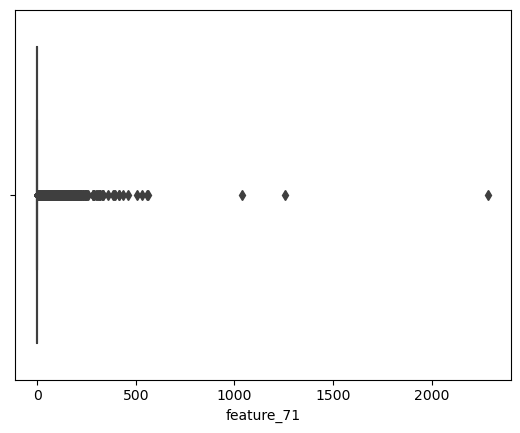

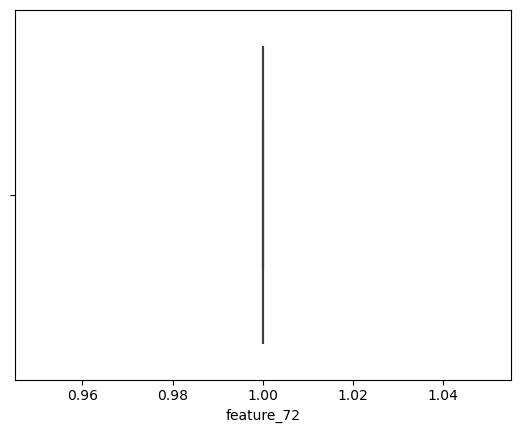

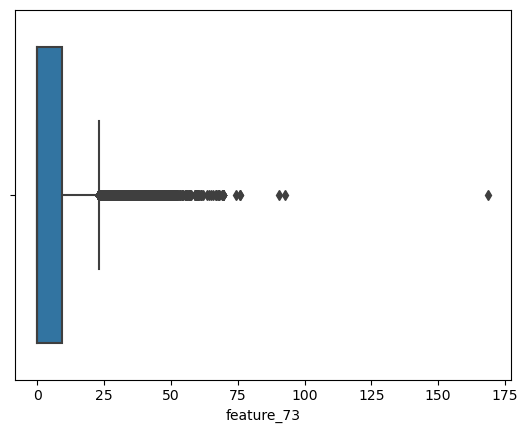

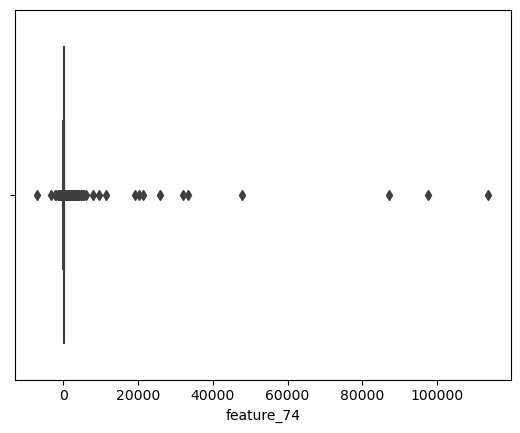

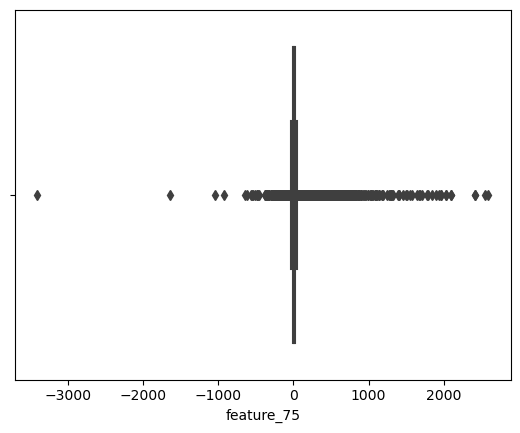

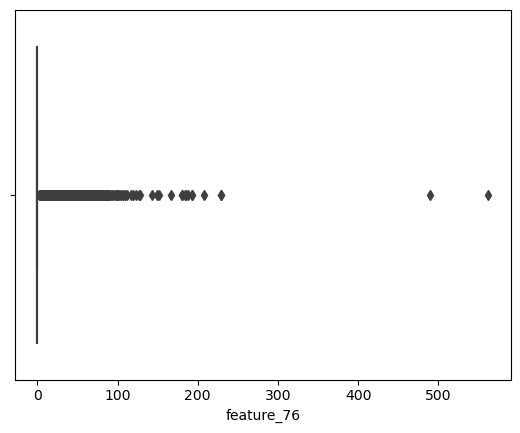

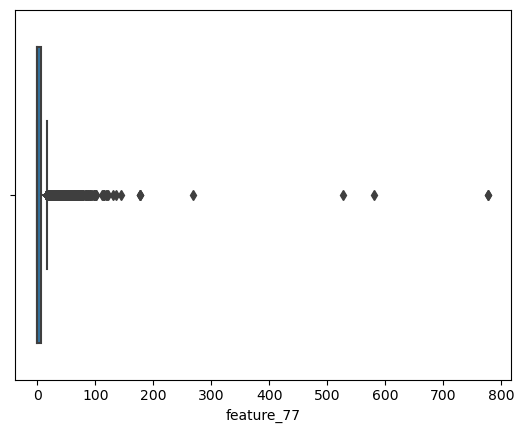

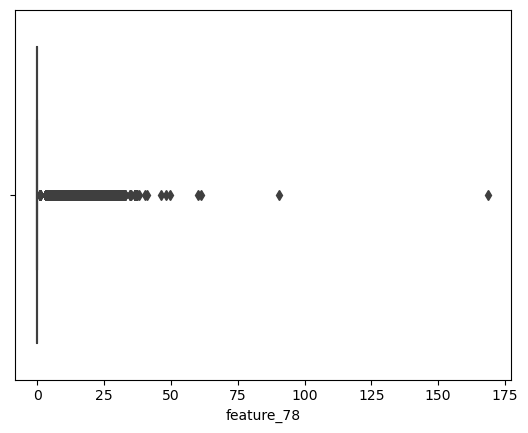

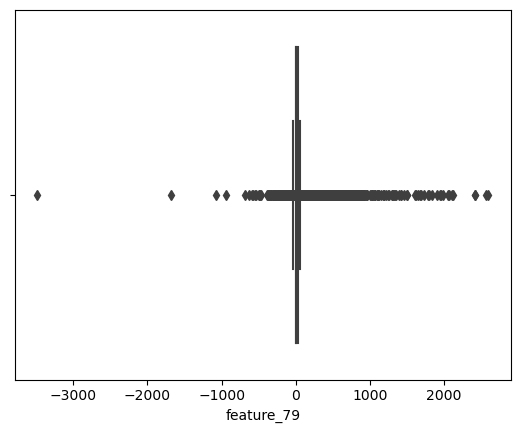

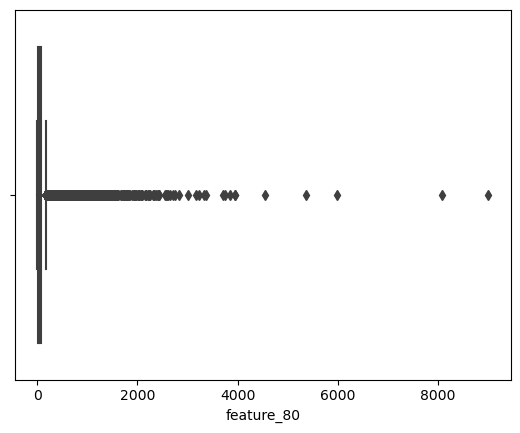

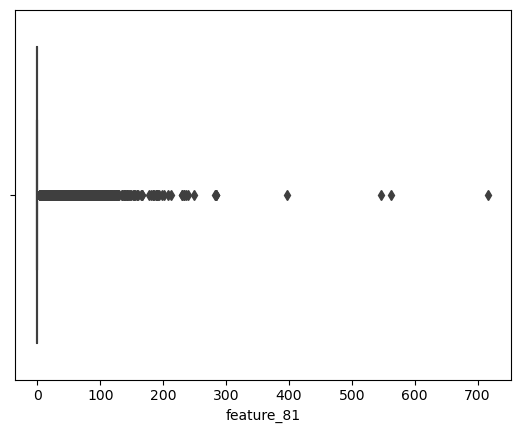

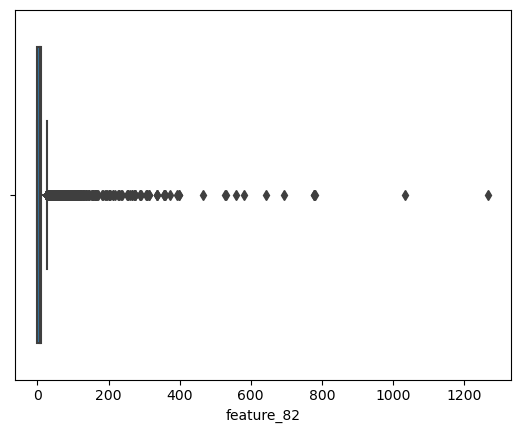

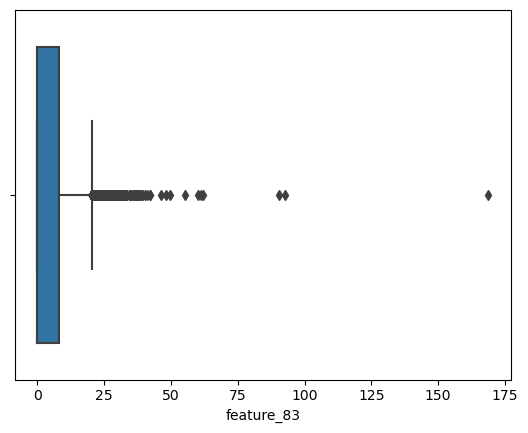

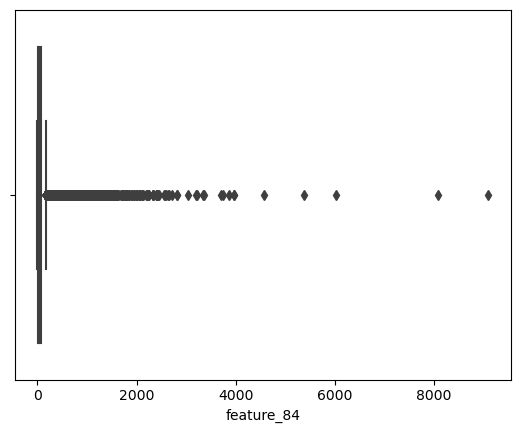

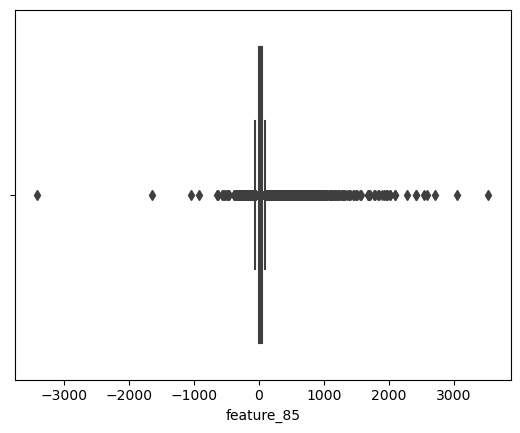

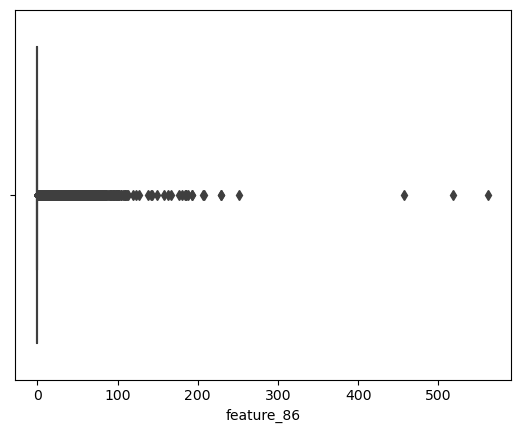

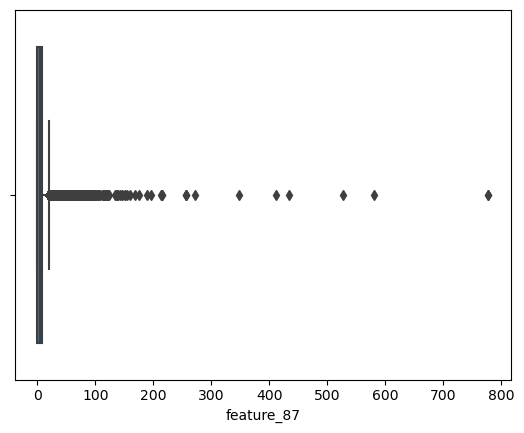

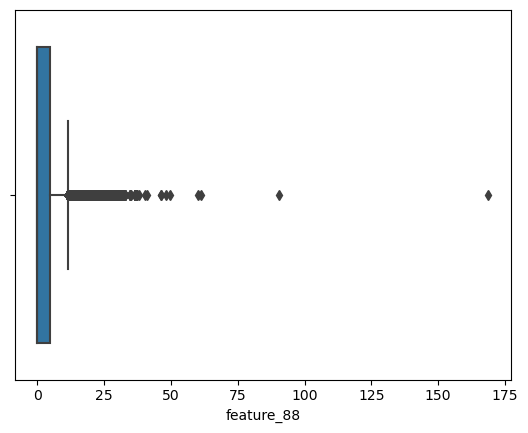

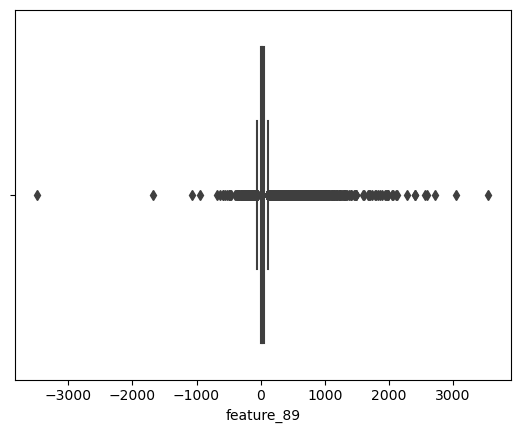

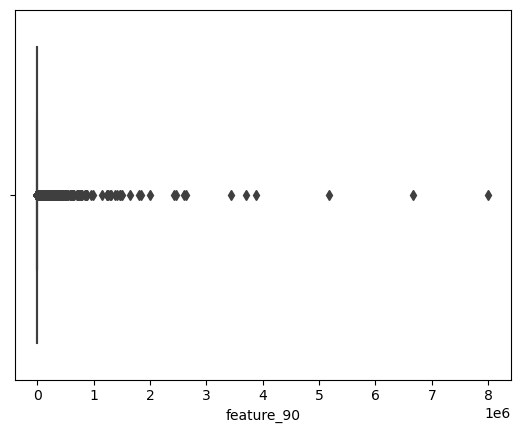

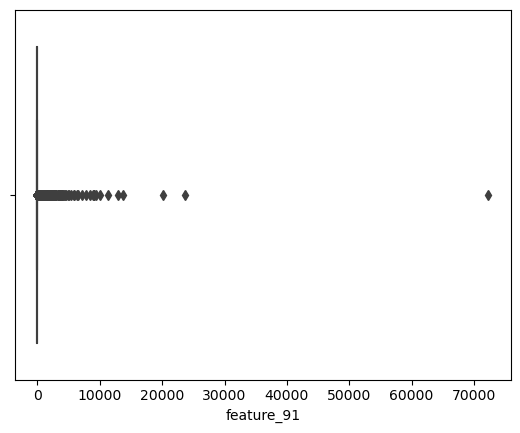

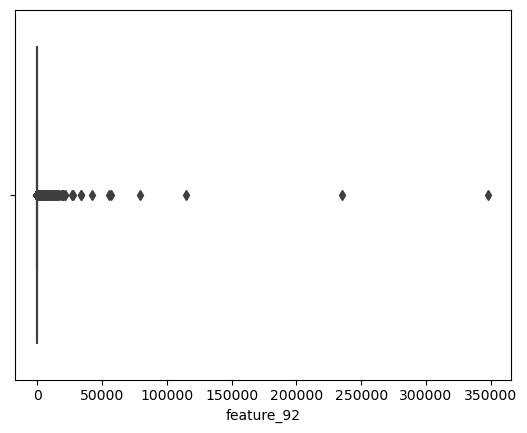

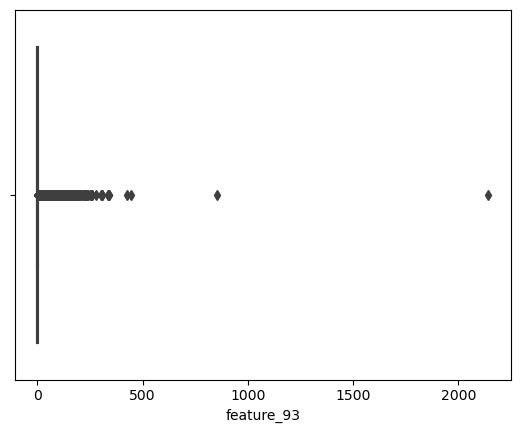

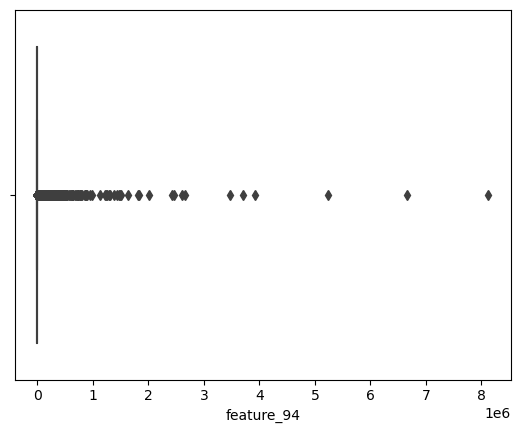

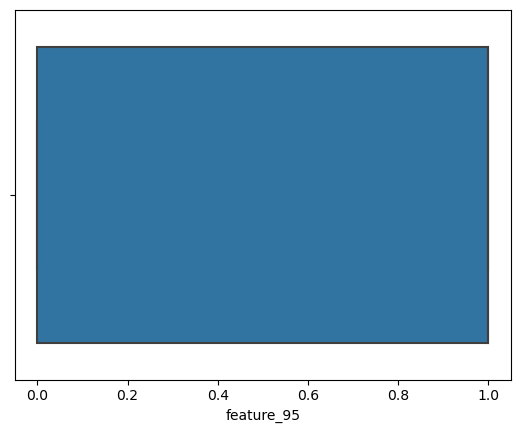

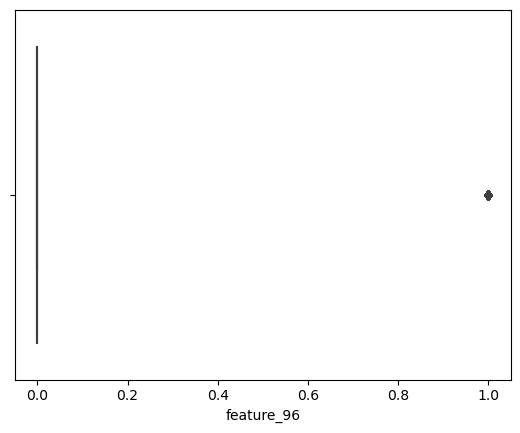

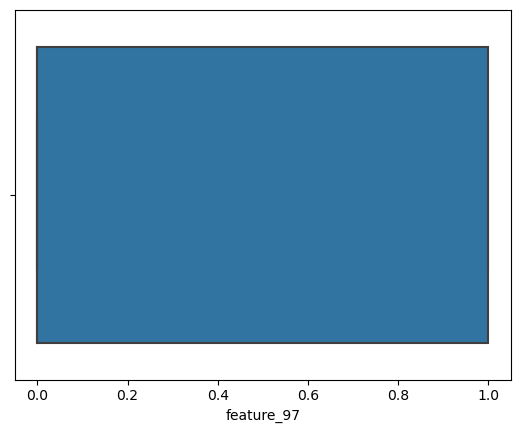

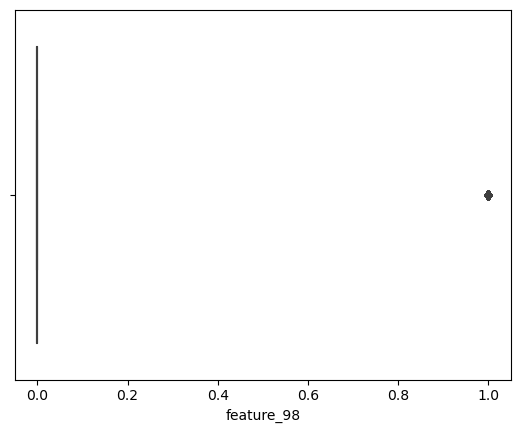

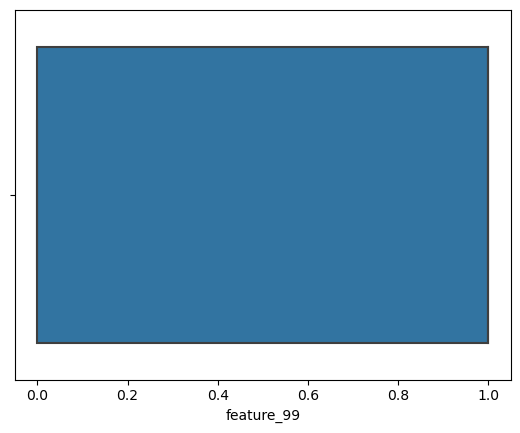

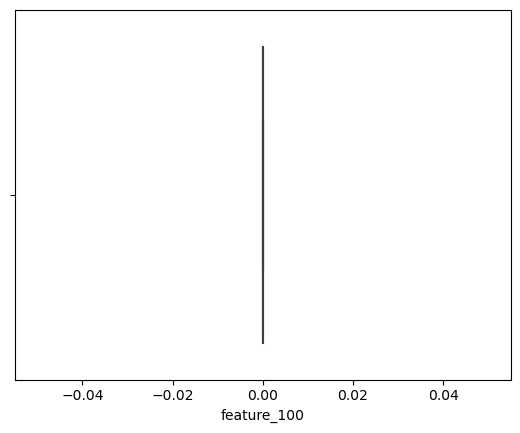

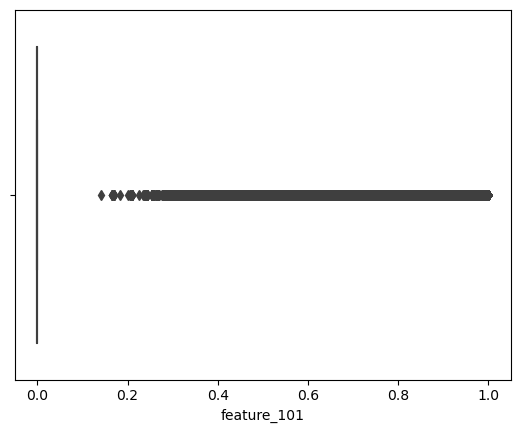

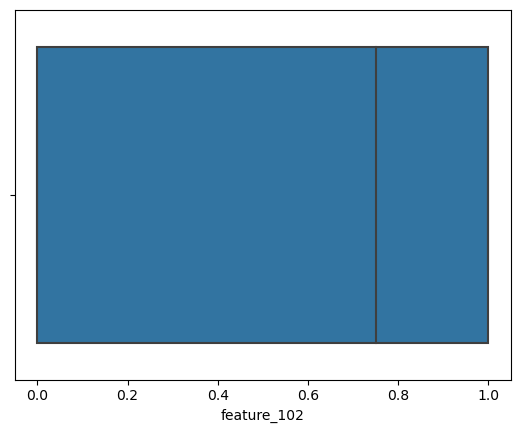

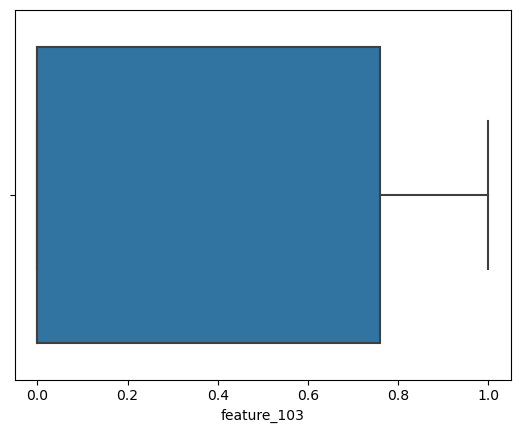

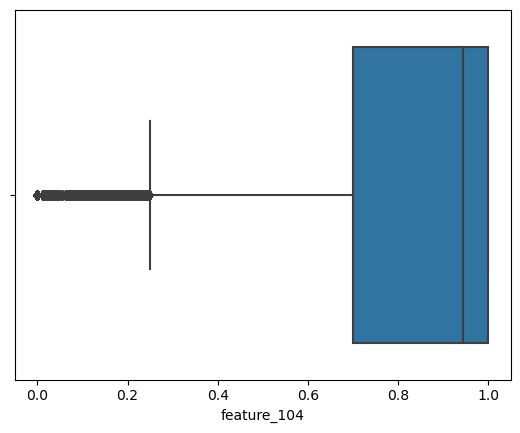

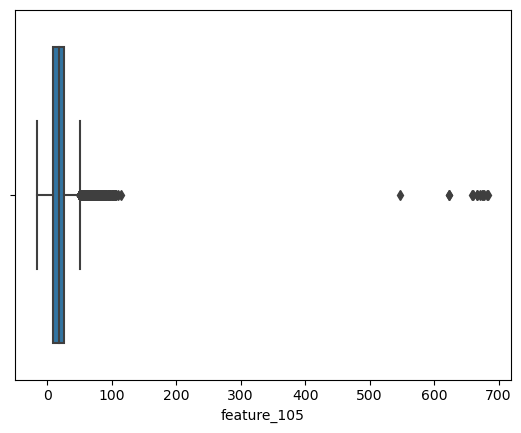

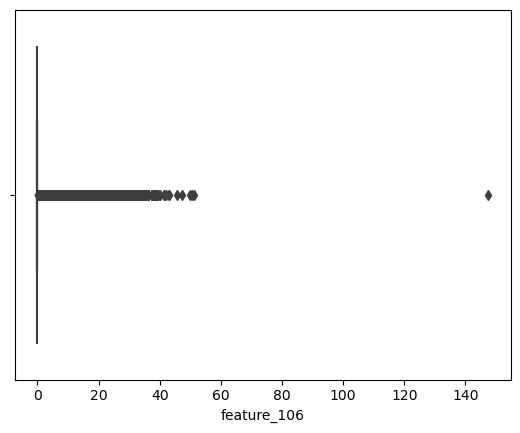

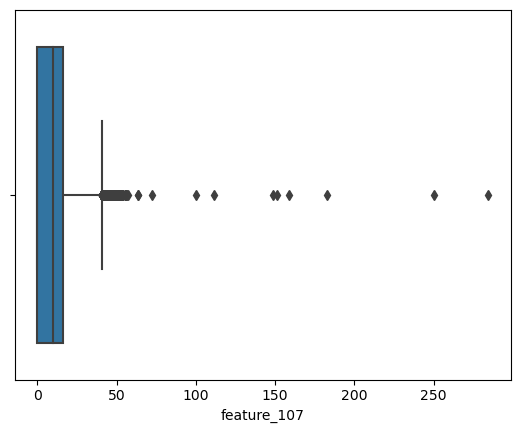

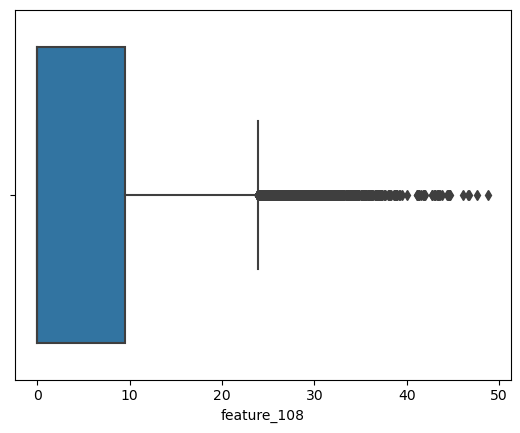

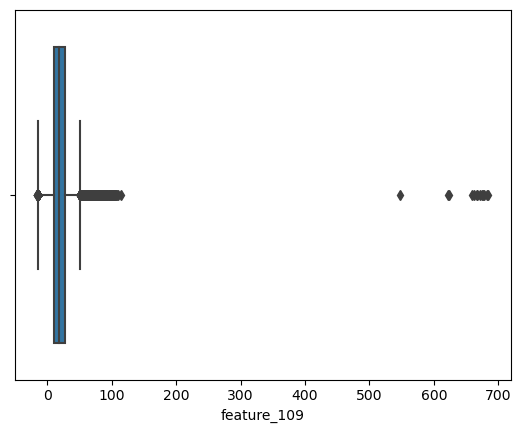

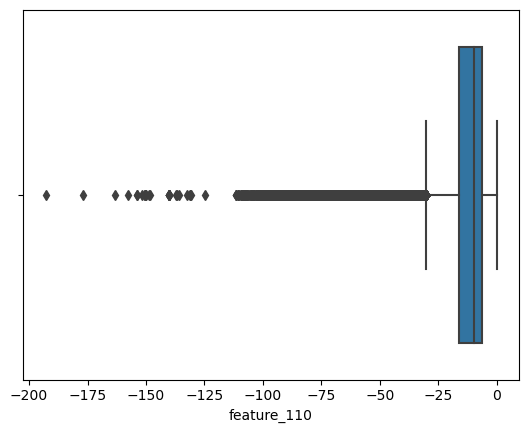

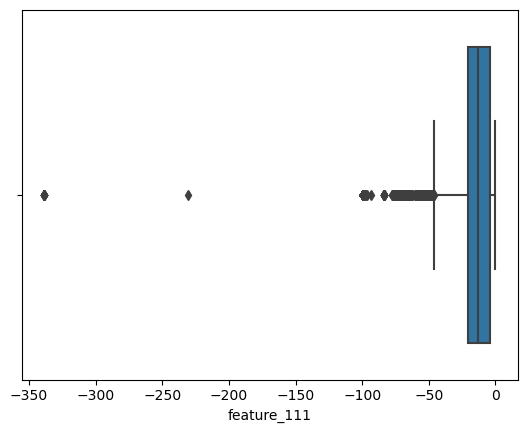

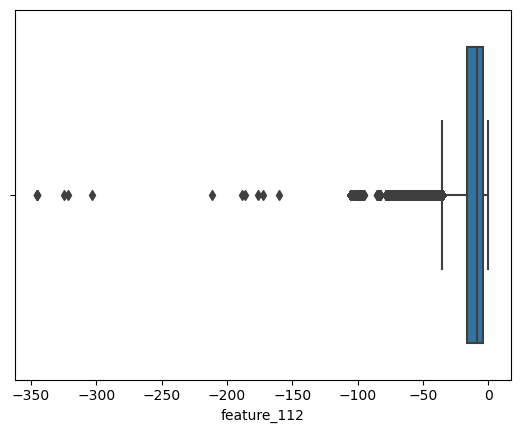

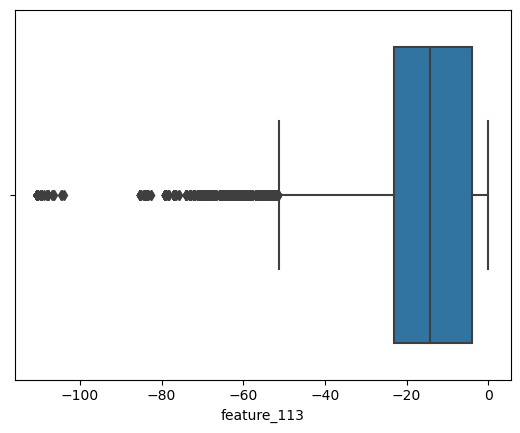

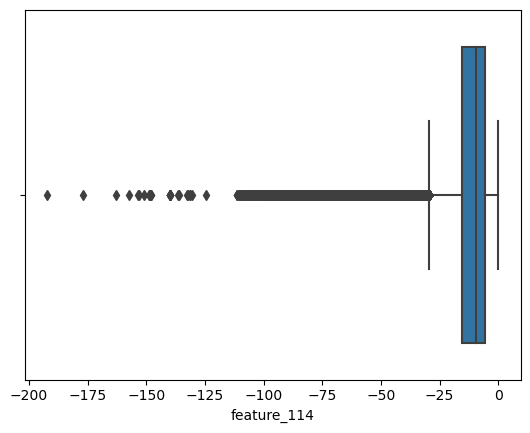

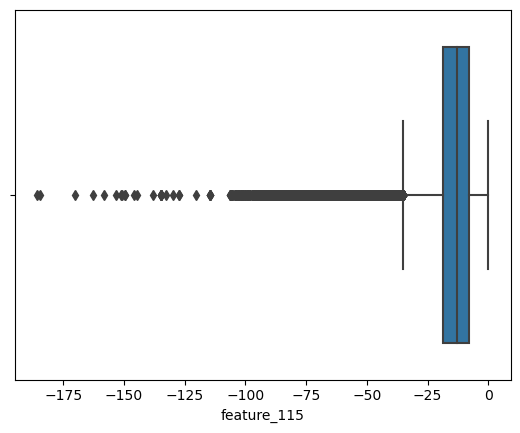

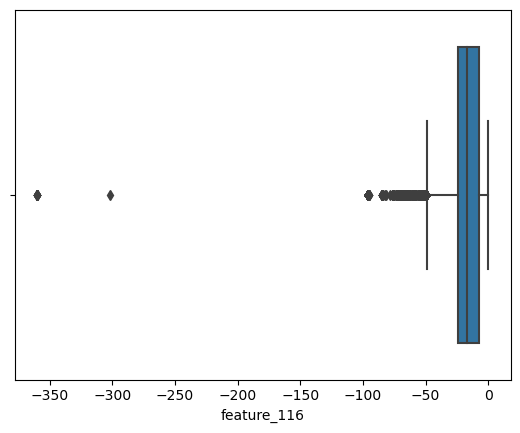

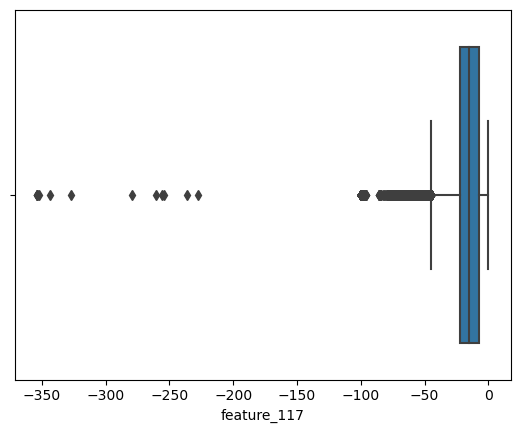

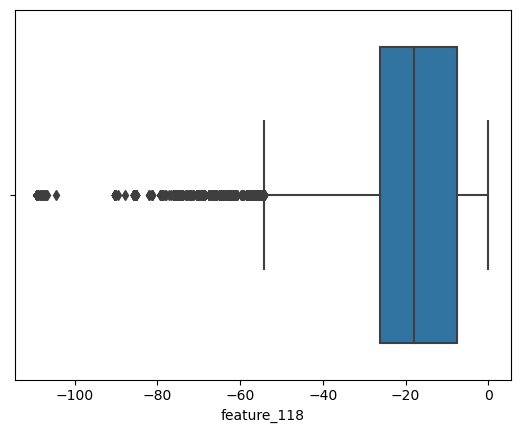

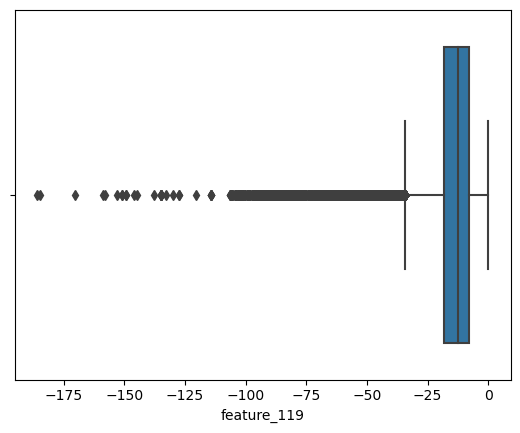

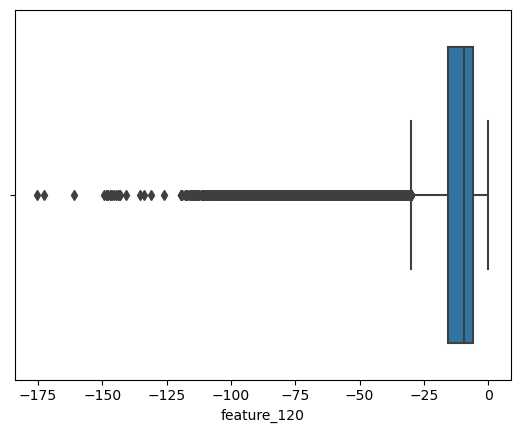

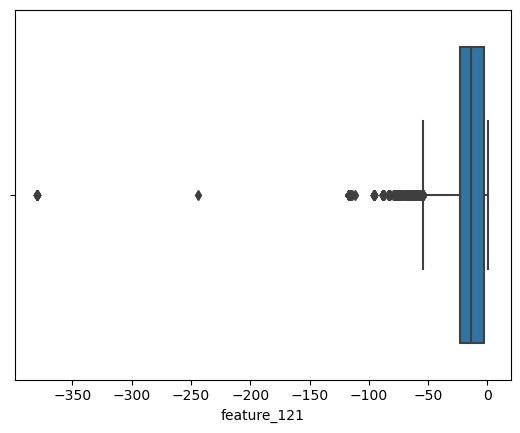

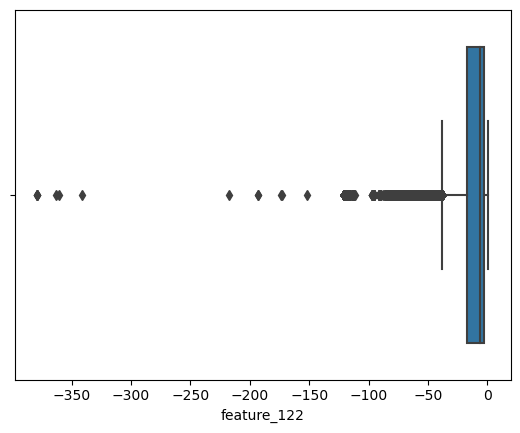

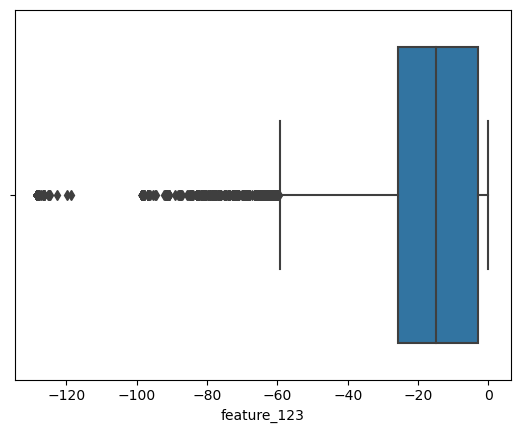

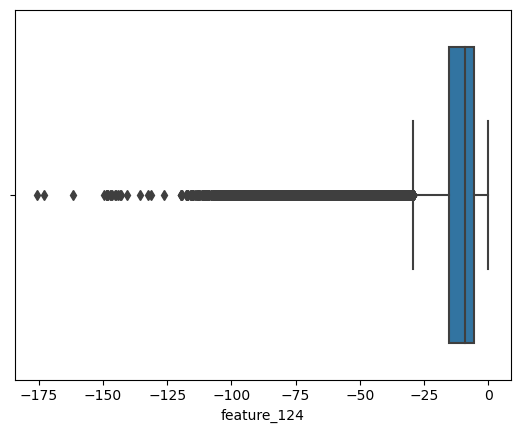

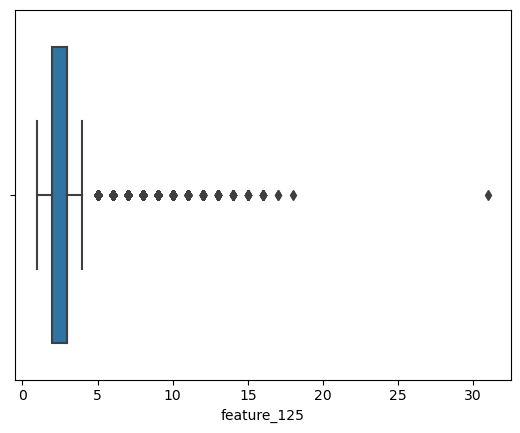

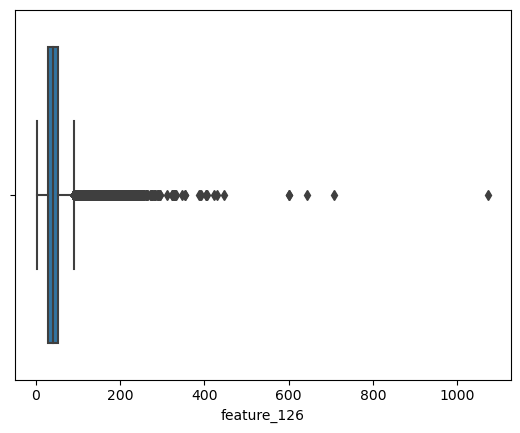

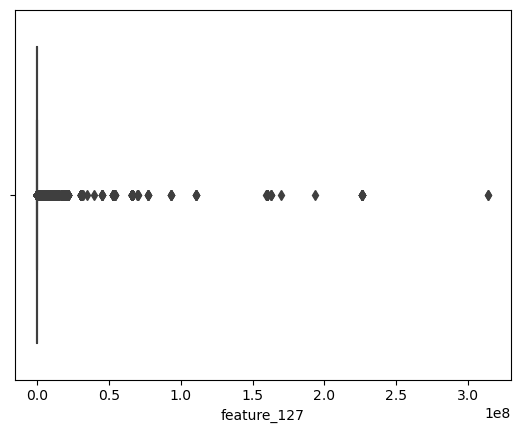

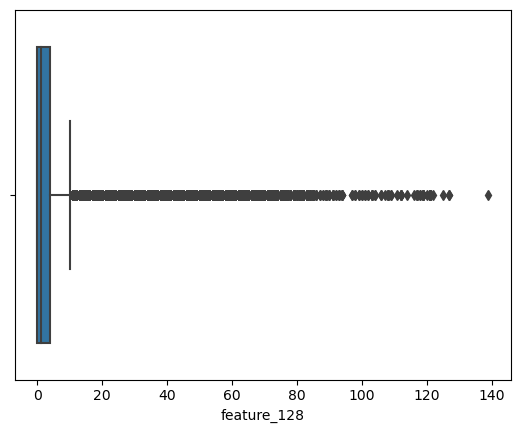

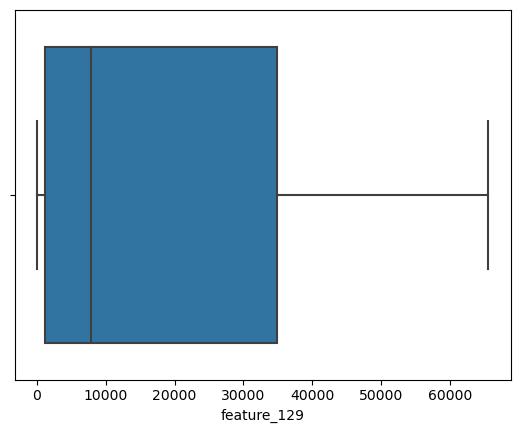

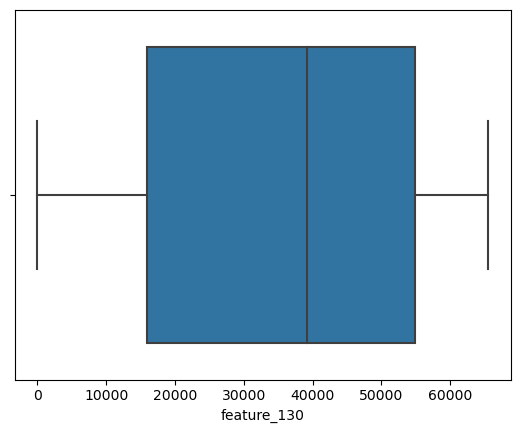

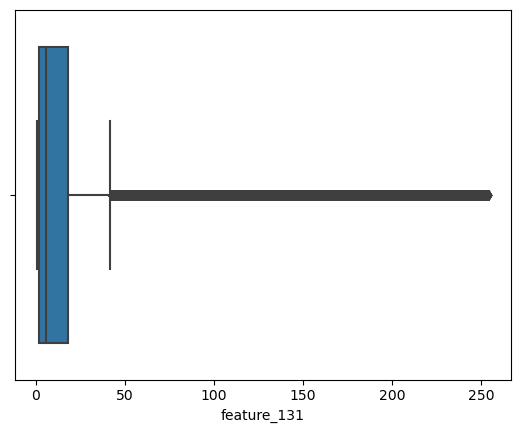

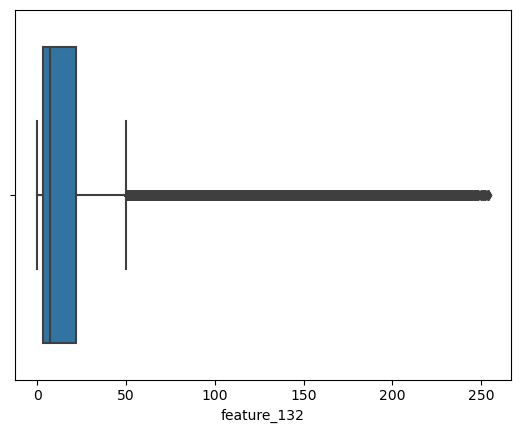

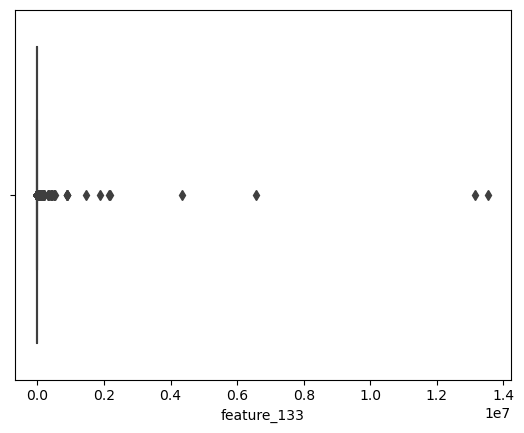

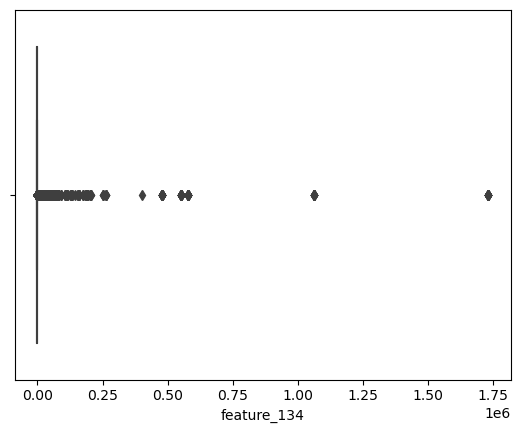

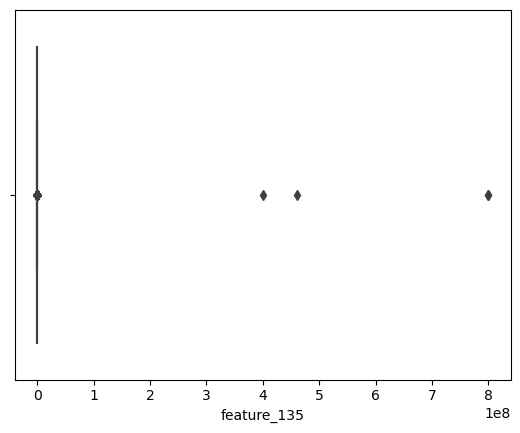

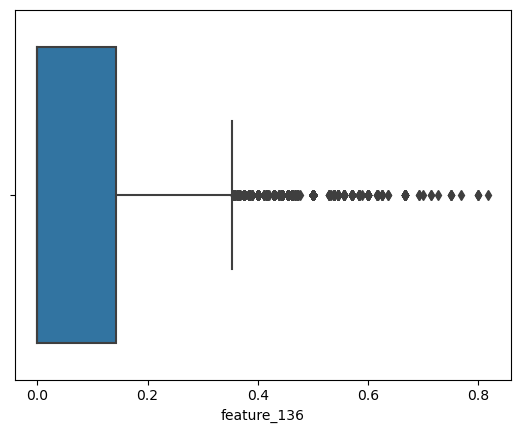

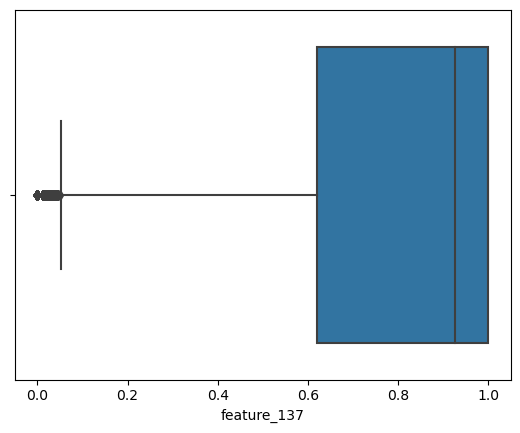

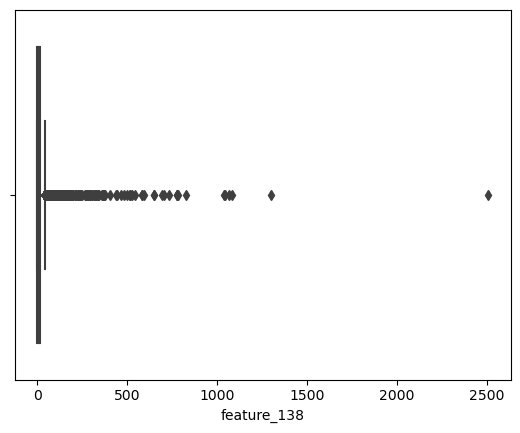

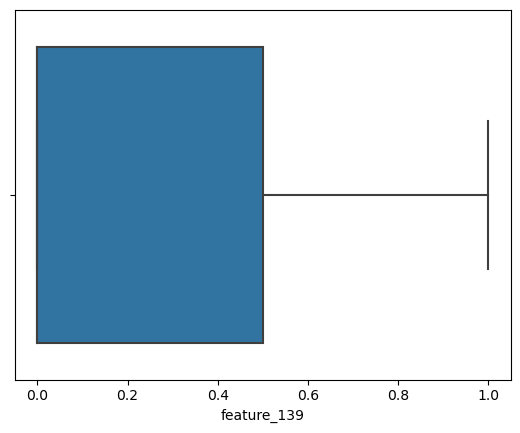

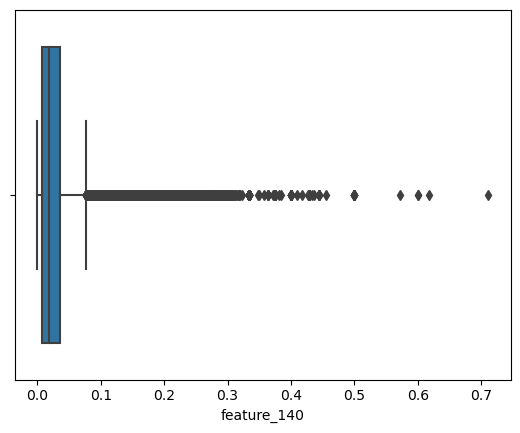

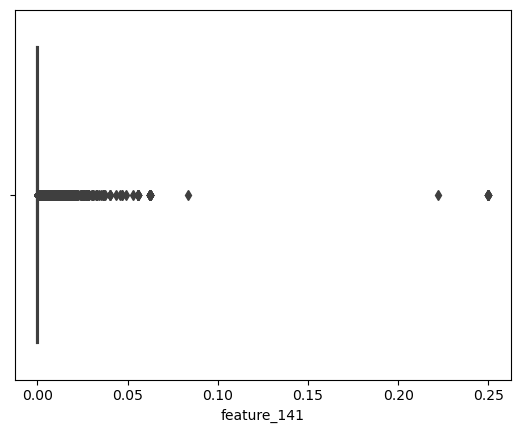

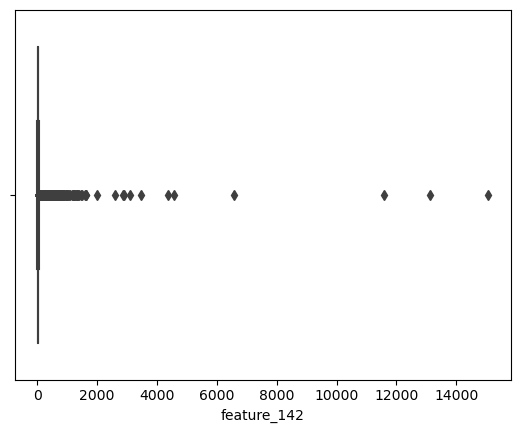

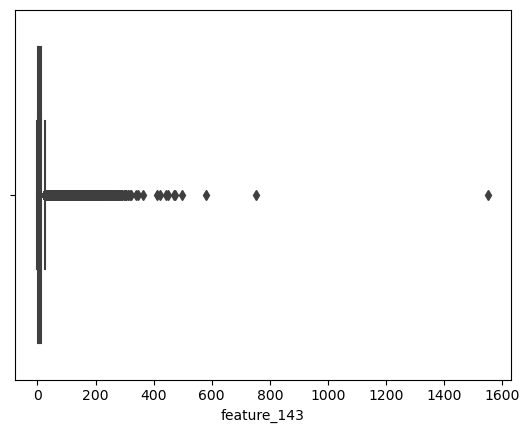

In [39]:
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.show()

In [40]:
df['rank'].unique()

array([0, 1, 2, 4, 3])

In [53]:
y=df_scaled['rank']
X=df_scaled.drop(columns=['rank'])

data = df_scaled



Заметим что значение фичей особо не коррелирует с рангом

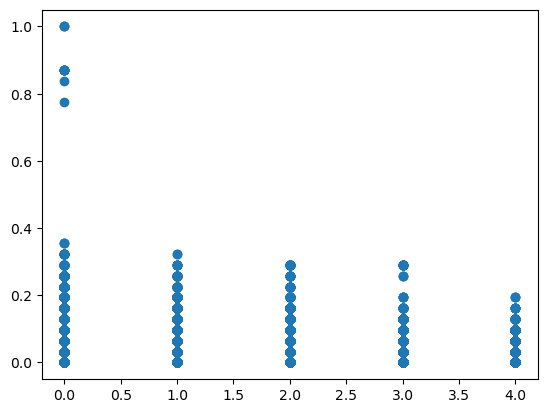

In [19]:
plt.scatter(data['rank'],data['feature_0'])

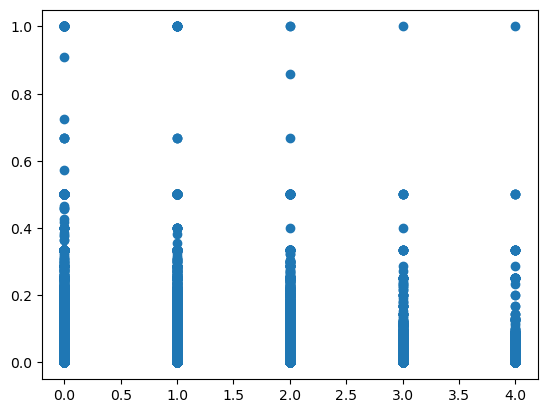

In [54]:
plt.scatter(data['rank'],data['feature_50'])

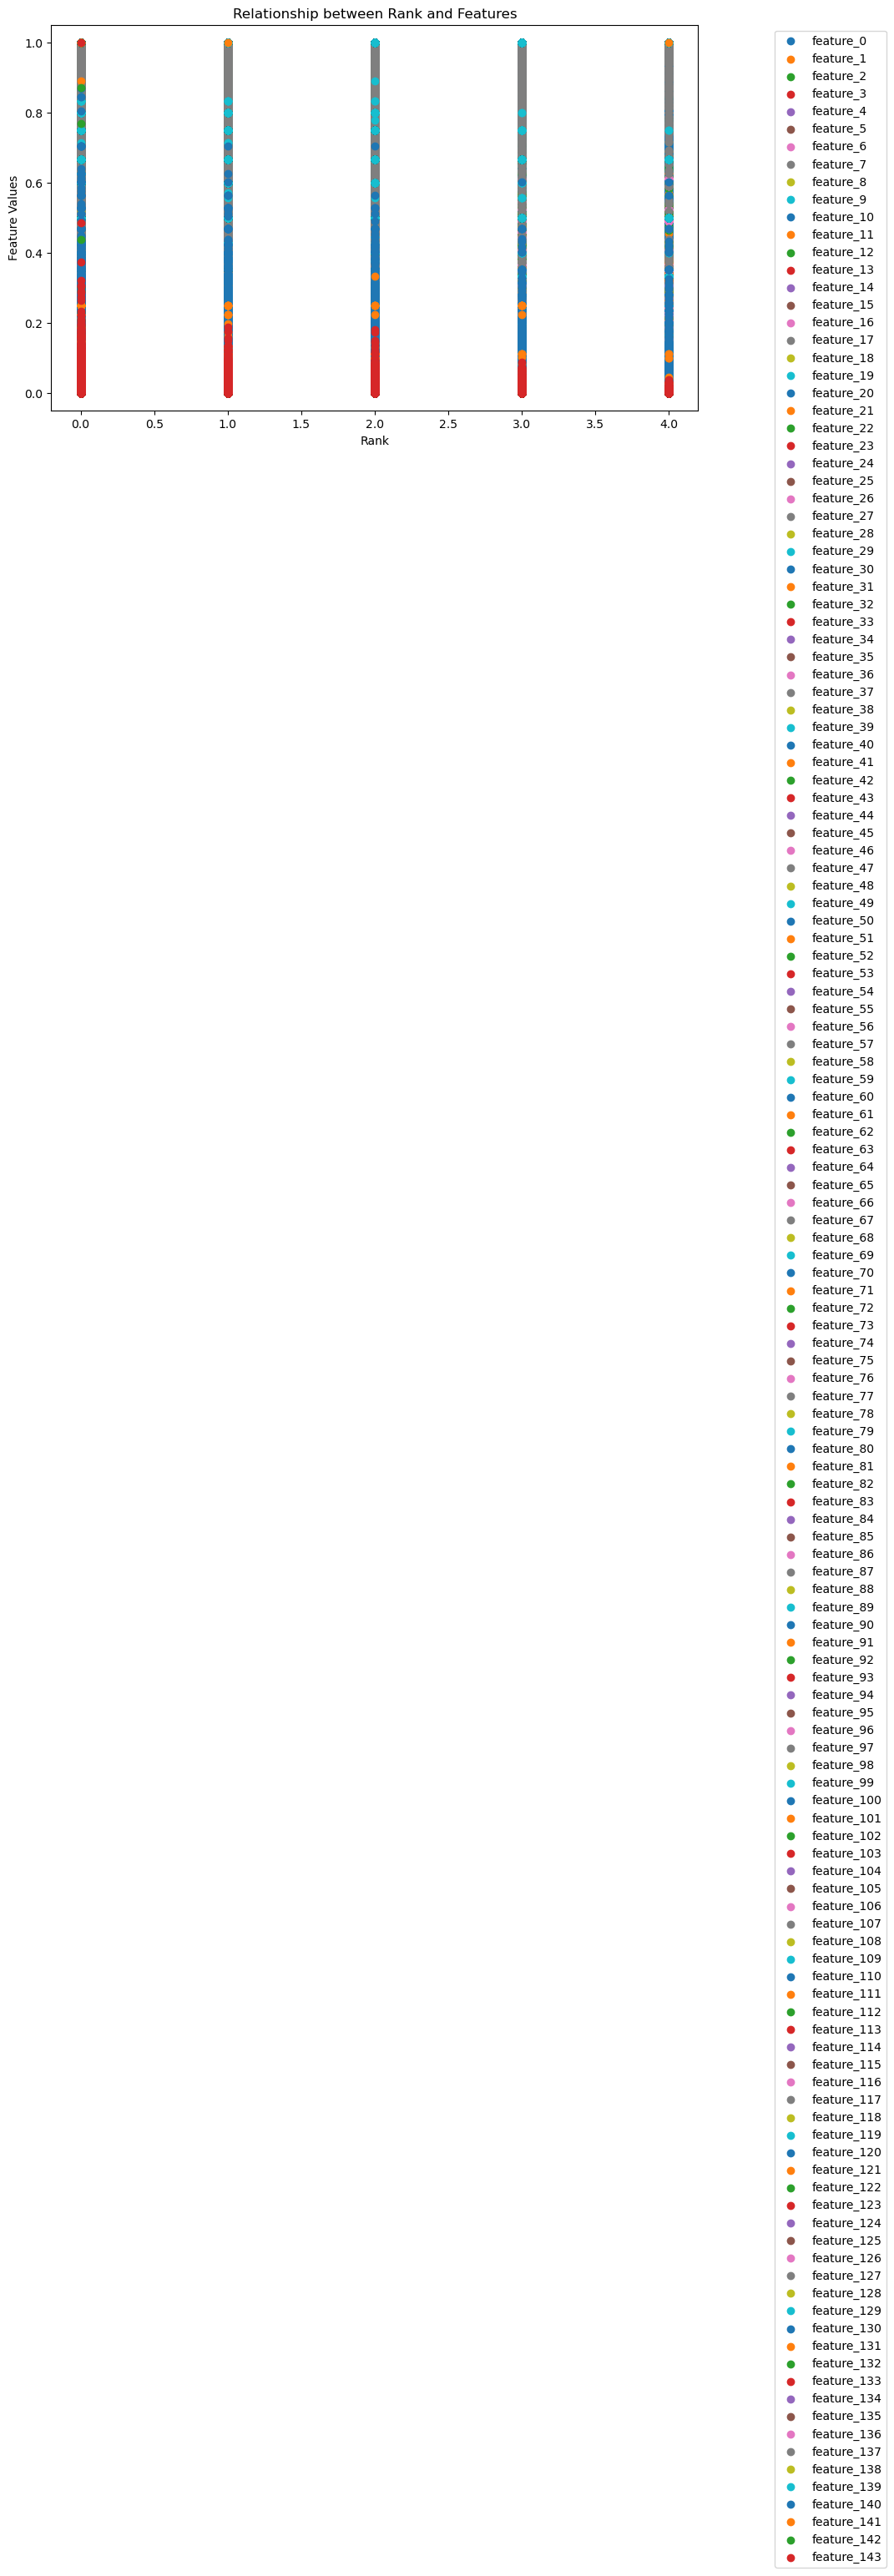

In [101]:
plt.figure(figsize=(10, 6))

# Построение scatter plot для каждого столбца feature_i
for i in range(144):
    plt.scatter(data['rank'], data['feature_{}'.format(i)], label='feature_{}'.format(i))

# Добавление заголовка и меток осей
plt.title('Relationship between Rank and Features')
plt.xlabel('Rank')
plt.ylabel('Feature Values')

# Отображение легенды и графика
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

Тут мы сравниваем какая модель лучше

In [43]:


# Load the scaled data

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['feature_{}'.format(i) for i in range(144)]], data['rank'], test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Create and train the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f'Gradient Boosting Accuracy: {gb_accuracy}')

# Creating and training a simple Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_y_pred)
print(f'Neural Network Accuracy: {nn_accuracy}')

# Creating and training the K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(np.array(X_test))
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f'K-Nearest Neighbors (KNN) Accuracy: {knn_accuracy}')

# Creating and training the Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'Support Vector Machine (SVM) Accuracy: {svm_accuracy}')


Random Forest Accuracy: 0.5849060613788999
Gradient Boosting Accuracy: 0.5689449970245686
Neural Network Accuracy: 0.5618252146561251


/Users/arkadiy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


K-Nearest Neighbors (KNN) Accuracy: 0.5338986653064695
Support Vector Machine (SVM) Accuracy: 0.5392119357306809


In [47]:
nn_model_4_layers = MLPClassifier(hidden_layer_sizes=(100, 50, 25, 10), activation='relu', max_iter=1000, random_state=42)
nn_model_4_layers.fit(X_train, y_train)
nn_y_pred_4_layers = nn_model_4_layers.predict(X_test)
nn_accuracy_4_layers = accuracy_score(y_test, nn_y_pred_4_layers)
print(f'Neural Network Accuracy with 4 Layers: {nn_accuracy_4_layers}')

Neural Network Accuracy with 4 Layers: 0.5606988013261923


лучший лес.  тогда попробуем в нем поперебирать параметры

In [56]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=400
                                                 ), param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

rf_y_pred_tuned = best_model.predict(X_test)
rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_tuned)

print("Best Parameters:", best_params)
print(f'Tuned Random Forest Accuracy: {rf_accuracy_tuned}')


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuned Random Forest Accuracy: 0.5881365297968205


а теперь можно натренеровать такое дерево

In [58]:

# Create and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=400,min_samples_leaf=1, min_samples_split= 5)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.5881365297968205


и теперь посчитаем ndcg_5

In [59]:
import numpy as np


def ndcg_at_k(y_true, y_score, k):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    dcg = np.sum((2 ** y_true - 1) / np.log1p(np.arange(1, k + 1)))

    ideal_order = np.argsort(y_true)[::-1]
    idcg = np.sum((2 ** np.take(y_true, ideal_order) - 1) / np.log1p(np.arange(1, k + 1)))

    # Вычисление NDCG
    ndcg = dcg / idcg
    return ndcg


ndcg_5 = ndcg_at_k(y_test, rf_y_pred, 5)
print(f'NDCG_5: {ndcg_5}')


NDCG_5: 1.0
